# Aspect/Modifier Classification Analysis

## Project Links

Below is the link for the GitHub project page. 

[Github link](https://github.com/ddey117/ABSA_Project_4)

Import research papers for developement of parser logic.
Includes pdf links for spaCy research paper as well as VADER sentiment intensity analyzer.
Much work has been done on aspect based sentiment analysis. Please feel free to check out some previous work in the link below. 

[Research Papers](https://github.com/ddey117/ABSA_Project_4/tree/main/research_papers)

For another way to navigate of my overall project, please feel free to check out a HTML version of my project overview at the link below. There is also a link in this directory to see an example of what exactly a Turk worker was looking at when they were labeling data for this project. 

[html project directory](https://github.com/ddey117/ABSA_Project_4/tree/main/html)



## Overview 


    The target for this project is an established e-commerce business with a large amount of review data, such as Amazon.com or other online retailers. The goal of this project is to take advantage of technology and models provided by Spacy combined with a pretrained sentiment intensity classifier provided by the NLTK toolkit in order to perform more fine grained sentiment analysis at scale in an efficient manner. This project takes advantange of the parsing and part of speech tagging capabilites of Spacy's pipeline in order to extract aspect/opinion/sentiment triplets. After the aspects are identified, they can be grouped using unsupervised machine learning clustering techniques; in this case k-means clustering for model speed and simplicity. The buisness can use the finished product to quickly transform a large amount of informal review data (text data from reviews that may ramble for pages) and transform it into helpful graphs in order to tune into a small number of categories and help funnel resources into areas where they are most needed.  


 
Data Exploration Notebook

Author: Dylan Dey



The Author can reached by email: ddey2985@gmail.com


## Buisness Problem
   
 
![CustomerService image](images/CustomerService.jpg)
           
    Sentiment analysis involves computationally identifying and categorizing the sentiment expressed by an author in a body of text. It has a wide range of applications in industry from stock speculation using sentiment expressed in news and blogs, to identifying customer satisfaction from their reviews and social media posts. 
    Today, most e-commerce website designs include a section where their customers can post reviews for products or services. Customers are free to write how they feel about fine grained aspects of a product at length. From a business perspective, very valuable information can be extracted from this section, such as customers' opinion on a product, understanding of a product, etc..
     On Amazon.com the rating can be between 1 and 5 where 1 is the worst and 5 is the best. A customer can leave as lengthy of a review as they wish about a product to explain why a given rating was posted.  For example, a customer may give a product a low rating because they didn't like someone they spoke to in customer service but liked everything else about the product.  In typical sentiment analysis, these kinds of nuances would be missed since it could only be determined  if the overall body of the review contained positive, neutral, or negative sentiment. Valuable information would be left on the table. 
     There is potentially a disconnect from the amazon review ratings, and the overall sentiment of the body text explaining the review, especially if you begin to break down the text into smaller aspects. Thus, Aspect Based Sentiment Analysis (ABSA) was chosen to see if a deeper understanding of each product can be gained by breaking down each review into aspect categories to be paired with predicted sentiment, which will then be compared with the overall rating (1-5). 
     It is often difficult to efficiently get useful data from a large collection of text data. A lot of e-commerce websites have thousands of reviews and more incoming all of the time. Thousands of reviews with hundreds of words of mostly unhelpful information seems fairly unmanageable to most companies. While the reviews are rather informal, if they are carefully broken down there is information worth saving before generalizing again for efficiency. Aspect Based Sentiment Analysis can transform a messy collection of thousands of informal reviews into a neat and manageable collection of a few aspect categories, in this case 4 different categories using the out of box  Aspect/Opinion/Sentiment Triplet Extractor. Each category will have an associated degree of sentiment related to it, and therefore graphics can easily be prepared and presented to digest more precisely what it is that customers do and do not like about a product in a quickly digestible format in real time. By breaking it down into these categories, say for example Product Design, Value, Quality, and Customer Support, the mass of text data has now been transformed into a numerical representation of sentiment towards broad categories of a product that can be directly improved upon by the company. If a product scores very high sentiment for value and design but lower scores for customer support, then a company knows it doesnt need to invest more money into improving the product and actually needs to focus on improving how its forward facing employees interact with customers. 

## The Data

Helpful links: 

[ReadMe file for Amazon Product Reviews](https://s3.amazonaws.com/amazon-reviews-pds/readme.html)  |
[MetaData](https://s3.amazonaws.com/amazon-reviews-pds/tsv/index.txt)


The Amazon Customer Reviews (Product Reviews) contains over 130+ million customer reviews available to researchers in TSV files in the amazon-reviews-pds S3 bucket in AWS US East Region, as per the provided readme file. The reviews were collected from 1995 to 2015. See the provided link for associated metadata. This project focuses on the dataset given by pulling “https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Electronics_v1_00.tsv.gz” from the S3 bucket.

Product_id ["B0001FTVEK"](https://www.amazon.com/Sennheiser-RS120-Wireless-Headphones-Charging/dp/B0001FTVEK) was chosen to showcase the triplet extractor as it had a large amount of verified reviews and a pair of headphones seemed like a reasonable choice for aspect based sentiment analysis.

##### Clean Data
Text data trends towards exponential growth with increasing dataset size. Therefore, text cleaning and preprocessing was a major considersation of this project. Please refer to my [Text Preprocessing Toolset](https://github.com/ddey117/preprocess_ddey117) that I created to use for this and other projects that involve text data preprocessing. 


#### Unlabeled Data Created Through Unsupervised Learning

This project showcases an out of box product for extracting opinon/aspect/sentiment triplets from a large amount of messy text data and converting it into a neat set of categories for analysis. To do this, however, it takes advantage of some simple clustering techniques from the sklearn cluster library. For this project, kmeans clustering was chosen for speed and simplicity. Error analysis will be discussed later in more detail in regards to how the model performs with clustering the reviews appropriately into categories and what issues it may run into when parsing internet language. Error analysis for the [SentimentIntensityClassifier](https://www.nltk.org/howto/sentiment.html) offered by the Natural Language ToolKit (NLTK library) will be tested against this 'newly' generated data from my unsupervised learning will be performed by comparing to a seperate set of hand labeled aspect/modifier pairs by humans in an expiremental setting. 

##### experimental setup
 Using the following [Turk_Form_HTML](Turk_Instructions.html) I crowdsourced some labels from humans using Amazon Mechanical Turk to compare to my model using the SentimentIntensityAnalyzer for each aspect/modifier pair extracted from the Amazon reviews. Amazon Mechanical Turk works by quickly dispersing large amounts of data to a large number of people in order to complete simple tasks for a reward. This experiment was set up to reward a penny for each aspect/modifier pair labeled for sentiment from very negative to very positive with an option for NA from a drop down menu (see html above for reference). In total, 410 workers submitted 6107 non-null aspect/opinion pairs for sentiment intensity pertaining to 1438 unique aspects. Duplicate pairs of aspect/opinion pairs were included to inspect variance of submission from human labels and machine labels for each opinion pair. No qualifications or screening was put in place before the workers were chosen, but I did review sections of the data and accept or reject what seemed reasonable. An additional 860 aspect/modifier pairs were hand labeled by a family member who only knew that the labels were extracted from amazon reviews about headphones and followed a similar template as the turk HTML. 


All labels were generated using my triplet extractor on the dataset describing Product_id ["B0001FTVEK"](https://www.amazon.com/Sennheiser-RS120-Wireless-Headphones-Charging/dp/B0001FTVEK) and randomized for different aspect/modifier pairs before sending out to humans for rating for sentiment. 



__________________________________________________________

<nav> 
<a href="https://s3.amazonaws.com/amazon-reviews-pds/readme.html">Amazon Product Reviews ReadME</a> |
<a href="https://s3.amazonaws.com/amazon-reviews-pds/tsv/index.txt">Amazon Product Reviews MetaData</a> |                             
<a href="https://www.amazon.com/Sennheiser-RS120-Wireless-Headphones-Charging/dp/B0001FTVEK">Sennheiser-RS120-Wireless-Headphones</a> 
</nav>


In [1]:
#import necessary libraries

import pandas as pd
import numpy as np
# import dataframe_image as dfi
import string
import re
from matplotlib import pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
# from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer 
# from wordcloud import WordCloud, STOPWORDS
import re,string
import unidecode
import html

import preprocess_ddey117 as pp


import requests
import os
import csv
import urllib.request
import gzip
import sys
import spacy
import json
# import boto3
# from boto.s3.connection import S3Connection

from collections import defaultdict
from sklearn import cluster
import seaborn as sns

import nltk
# nltk.download('vader_lexicon')

import spacy
nlp = spacy.load("en_core_web_lg")

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# from nltk.collocations import *
# bigram_measures = nltk.collocations.BigramAssocMeasures()
# trigram_measures = nltk.collocations.TrigramAssocMeasures()
# fourgram_measures = nltk.collocations.QuadgramAssocMeasures()

/Users/dylandey/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/dylandey/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/dylandey/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/dylandey/anaconda3/en

A large collection of amazon reviews that fall under the "electronics" category. For this project, product_id ["B0001FTVEK"](https://www.amazon.com/Sennheiser-RS120-Wireless-Headphones-Charging/dp/B0001FTVEK) was chosen as it had a large amount of verified reviews and a pair of headphones seemed like a reasonable choice for aspect based sentiment analysis. 

In [2]:
# df = pd.read_csv('data/df_electronics.tsv', sep='\t')
# df.groupby('product_id').count().sort_values(by='star_rating').tail(20)

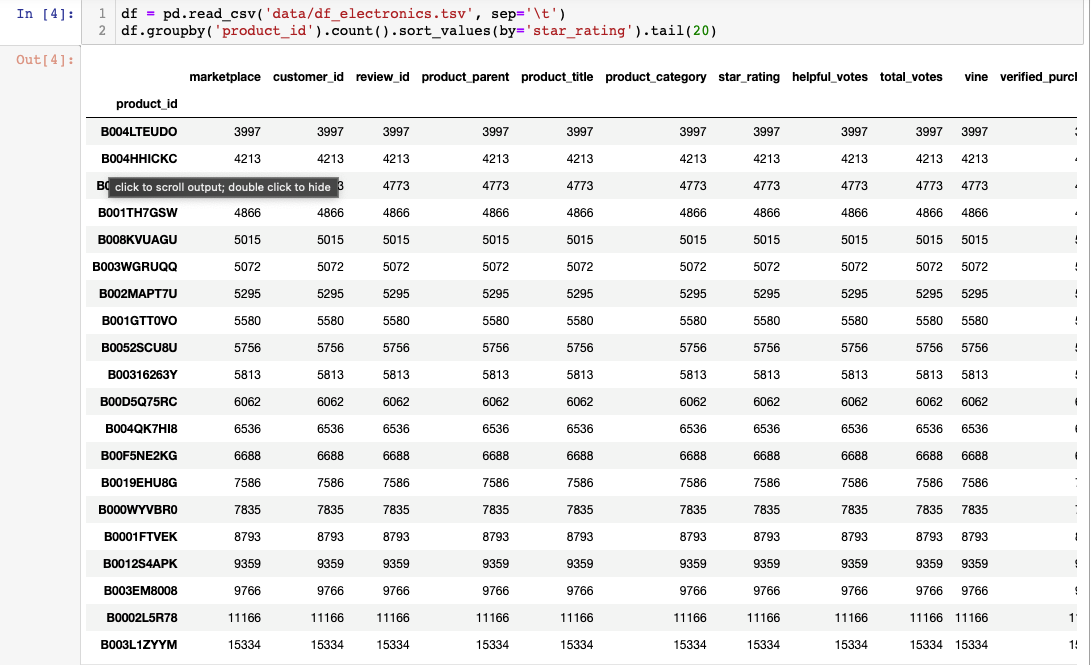

In [3]:
#testing other dataframes not shown in this notebook



# df_hp1 = df.loc[df['product_id'] == 'B003EM8008'].copy()
# df_hp1.reset_index(drop=True, inplace=True)
# df_hp2 = df.loc[df['product_id'] == 'B0001FTVEK'].copy()
# df_hp2.reset_index(drop=True, inplace=True)
# df_hp3 = df.loc[df['product_id'] == 'B004RKQM8I'].copy()
# df_hp3.reset_index(drop=True, inplace=True)
# df_hp4 = df.loc[df['product_id'] == 'B0038W0K2K'].copy()
# df_hp4.reset_index(drop=True, inplace=True)

# df_sb1 = df.loc[df['product_id'] == 'B00D5Q75RC'].copy()
# df_sb1.reset_index(drop=True, inplace=True)
# df_sb2 = df.loc[df['product_id'] == 'B00F5NE2KG'].copy()
# df_sb2.reset_index(drop=True, inplace=True)

# df_mp1 = df.loc[df['product_id'] == 'B00020S7XK'].copy()
# df_mp1.reset_index(drop=True, inplace=True)
# df_mp2 = df.loc[df['product_id'] == 'B002MAPT7U'].copy()
# df_mp2.reset_index(drop=True, inplace=True)

# #dropping uneccessary columns 

# columns_td = ['marketplace', 'customer_id',  'product_id',
#               'product_parent', 'product_title', 'product_category', 
#               'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
#               'review_headline', 'review_date']

# df2.drop(columns=columns_td, inplace=True)

#saving dataframe with chosen product for quick loading time

# df2.to_csv('data/df_electronics_example.csv', index=False)

,review_id,star_rating,review_body
0,R17U6AU06HR16Q,5,Great product.
1,R31Y01GPXH7P64,4,work great sounds amazing
2,RG40FO7CNWOG7,5,Works tremendously well.
3,R2CI6TXIGZR6RU,5,THEY WORK GREAT
4,R37KF8VRBUZNQD,5,Works fine




star rating value counts


5    4715
4    1924
1     829
3     724
2     601
Name: star_rating, dtype: int64

<AxesSubplot:>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8793 entries, 0 to 8792
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    8793 non-null   object
 1   star_rating  8793 non-null   int64 
 2   review_body  8793 non-null   object
dtypes: int64(1), object(2)
memory usage: 206.2+ KB


distribution of star rating


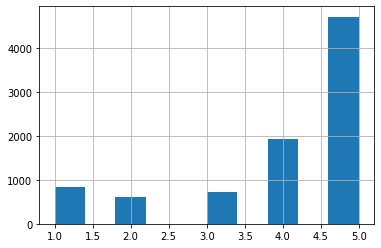

In [4]:
#display important information about dataset
#Almost 9000 reviews, mostly 4 or 5 stars.  

df = pd.read_csv("data/df_electronics_example.csv")
display(df.head())
print("\n")
print('star rating value counts')
display(df.star_rating.value_counts())
display(df.star_rating.hist())
df.info()
print("\n")
print("distribution of star rating")

# Function Definition

In [5]:
#I wrote a library for taking care of many common tasks for data language processing.
#However, since this project must load spaCy for parsing the aspect/opinion pairs
#Some of the major processing will be handled by spaCy

#simple processing such as removing emails, html tags, urls
#accented characters and counting all words in the dataset
#are handled with my own toolset

def master_preprocess(df):
    df['wordcounts'] = df['review_body'].apply(lambda x: pp.get_wordcounts(x))
    df['review_body'] = df['review_body'].apply(lambda x: pp.remove_emails(x))
    df['review_body'] = df['review_body'].apply(lambda x: pp.remove_urls(x))
    df['review_body'] = df['review_body'].apply(lambda x: pp.remove_html_tags(x))
    df['review_body'] = df['review_body'].apply(lambda x: pp.remove_accented_chars(x))
    return df

In [6]:
df = master_preprocess(df)

In [7]:
#Looking at the statistics for wordcounts below
#The median length for a amazon review
#for this particular set of headphones is about 50 words
#ranging from 1 to 1565 words for each review
#Thus showing the wide range of informal data that is 
#allowed in the review body and how unmanageable it can
#become
#With this dataset the total amount of words 
#has already reached over half of a million words


display(df.describe())
df.wordcounts.sum()

,star_rating,wordcounts
count,8793.000000,8793.000000
mean,4.034346,74.089730
std,1.318899,91.416481
min,1.000000,1.000000
25%,4.000000,23.000000
50%,5.000000,47.000000
75%,5.000000,92.000000
max,5.000000,1565.000000


651471

## Explaining The Parser

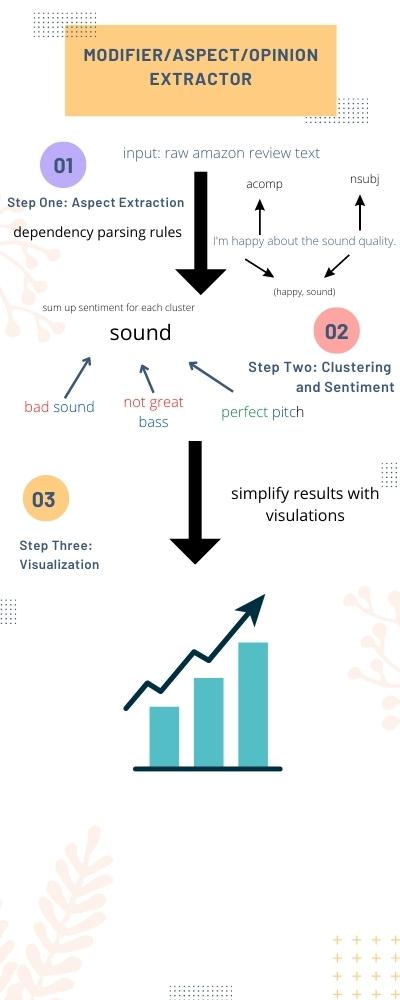


<b><span style="color:Green">Clustering and Polarity</span></b>

A large number of amazon reviews produce a large number of aspect-modifier pairs. These pairs ultimately seemed to diverge to common topics, and therefore it would make sense to use machine learning to automatically figure out these categories for us. This leads to a better summation of insight from the total pool of customers who were kind enough to leave a review. Polarity scores are also averaged out of every cluster to give a quantifiable explanation to opinion to distinct categories of a given product. 


<b><span style="color:Blue">Word Vectors and Clustering</span></b>

In order to work with any amazon review data, first the text data must be converted into something that a machine can recognize. The most famous implementation of words vectors is the word2vec project. However, spaCy vectorization was chosen for this projec as it provides fast and easy access to over a million unique word vectors, and its multi-task CNN model is trained on 'web' data and not 'newspaper' data as in other libraries like NLTK.

The word vectors were then grouped using K-Means clustering algorithm in Scikit-Learn. Other clustering algorithms such as DBSCAN  were tested. However, K-Means gave optimal results with four clusters. The clusers were labeled with input from a user after suggesting the top most common word for each cluster. 

Below Is the pipeline design for spaCy and a description for the size and sources for the model loaded to run this project and parse the amazon reviews. 

[en_core_web_large](https://spacy.io/models/en#en_core_web_lg)

![spaCy image](images/spaCy.jpg)

<div class="alert alert-block alert-danger">

"spaCy uses the terms **head** and **child** to describe the words connected by a single arc in the dependency tree. The term **dep** is used for the arc label, which describes the type of syntactic relation that connects the child to the head. As with other attributes, the value of .dep is a hash value. You can get the string value with .dep_."   [Navigating The Parse Tree](https://spacy.io/usage/linguistic-features#navigating)

</div>

<div class="alert alert-block alert-info">
    
<span style="color:green"><b>First Rule of Dependency Parser:</b>  The Aspect (A) token is a subject noun with a child modifier (M) that has a relation of amod (adjectival modifier). This just means that the aspect and opinion share a simple adjective/noun relationship that can be extracted. However, there are certain caveats that need to be kept in mind when parsing the tree for this rule. </span> 

  
   - <span style="color:green">First, it is important to check to see if there is an additional adverbial modifier that could adjust the intensity of the sentiment implied by the adjective and adverb combination in regards to the subject/aspect. This is important to keep in mind as we are taking advantage of NLTK vader sentiment intensity analyzer which can make use of additional adverbs to get a better understanding of sentiment.</span>   
   
  
   - <span style="color:green">
    Another important thing to keep in mind when parsing for this rule is to be aware of the possibility of negating the adjective with ‘no’ as a determiner. </span>

                                                                
                                                                
                                                                
                                                                
</div>

<div class="alert alert-block alert-warning">
    
<b>First Rule Examples</b>

<b>Example1:</b> The <span style="color:green">comfortable</span> <span style="color:blue">headphones.</span> 

<b>Example2:</b> The <span style="color:purple">most</span> <span style="color:green">comfortable</span> <span style="color:blue">headphones.</span>

<b>Example3:</b><span style="color:red"> No</span> <span style="color:green">comfortable</span> <span style="color:blue">features.</span>


- <span style="color:red">det = determiner</span>

- <span style="color:blue">A = aspect</span>

- <span style="color:green">M = modifier</span>

- <span style="color:purple">amod = adjectival modifier</span>
</div>



<div class="alert alert-block alert-info">
    
<span style="color:green"><b>Second Rule of Dependency Parser:</b>  The aspect (A) is a child of something with a relation of nominal subject (nsubj.) while the modifier (M) is a child of the same something with a relationship of direct object. In this case, the adjective would be acting as the determiner of the clause. For simplicity's sake, it was determined to assume that each verb will have only one NSUBJ and DOBJ. This is a fair assumption for the application of this project, because even if there are multiple subjects, they will both be reviewing the same thing and will likely share the same opinion as it is written as a single review. For example, if an author were to say “My wife and I bought the awesome headphones”, we still only want to extract the keywords ‘awesome’ and ‘headphones.’ If this sounds confusing, hopefully the example below will help clarify. </span>                                                                 
</div>

<div class="alert alert-block alert-warning">
    
<b>Second Rule Example</b>

<b>Example:</b><span style="color:red"> I </span>bought the <span style="color:green">awesome</span> <span style="color:blue">headphones.</span>


- <span style="color:red">nsubj = nominal subject</span>

- <span style="color:blue">dobj =headphones</span>

- <span style="color:green">det= awesome</span>


</div>

<div class="alert alert-block alert-info">
    
<span style="color:green"><b>Third Rule of Dependency Parser:</b>  The modifier (M) is a child of something with a relation of an adjectival complement (acomp), while the aspect (A) is a child of that same something with a relation of nominal subject (nsubj). </span>    

   - <span style="color:green">This rule needs to handle special cases in which the child is tagged as a modal verb with an auxiliary dependency. This would flag for phrases such as “the sound of the speakers could be better.” For special cases like this, the parser will add a negative prefix before scoring the aspect/modifier pairs for sentiment.</span>   
</div>

<div class="alert alert-block alert-warning">
    
<b>Third Rule Examples</b>

<b>Example1:</b> Barb is <span style="color:green">happy</span> about the <span style="color:blue">sound quality.</span> 

<b>Example2:</b> <span style="color:blue">This</span><span style="color:green"> could be better.</span>

Example2 would be extracted as A= "this" and M= "not better"


- <span style="color:blue">A = aspect</span>

- <span style="color:green">M = modifier</span>


</div>


<div class="alert alert-block alert-info">
    
<span style="color:green"><b>Fourth Rule of Dependency Parser:</b>  The aspect (A) is a child of something with a relationship of passive nominal subject (nsubjpass) while the modifier (M) is a child of that same something with a relationship of adverbial modifier (advmod). In other words, the modifier is an adverbial modifier to a passive verb. </span>    

   - <span style="color:green"> nsubjpass: A passive nominal subject is a noun phrase which is the syntactic subject of a passive clause. </span>  
   
   - <span style="color:green"> This step of the parser will also check to add a negative prefix before extracting and scoring for sentiment if necessary </span>
  
  
</div>


<div class="alert alert-block alert-warning">
    
<b>Fourth Rule Examples</b>

<b>Example1:</b> The <span style="color:blue">headphones</span> died <span style="color:green">quickly.</span> 



- <span style="color:blue">A = aspect</span>

- <span style="color:green">M = modifier</span>

<div class="alert alert-block alert-info">
    
<span style="color:green"><b>Fifth Rule of Dependency Parser:</b>  The aspect (A) is a child of the modifier with a relationship of nominal subject, while the modifier has a child with a relation of copula(cop).
Here the parser is looking for the complement of a copular verb. An often used copula verb is the word “is,” as in the phrase “Bill is big." </span>    

   - <span style="color:green"> Assumption - A verb will have only one NSUBJ and DOBJ </span>  
   
   - <span style="color:green"> cop: copula A copula is the relation between the complement of a copular verb and the copular verb. (We normally take a copula as a dependent of its complement. </span>
  
  
</div>

<div class="alert alert-block alert-warning">
    
<b>Fifth Rule Example</b>

<b>Example1:</b> The <span style="color:blue">sound</span> is <span style="color:green">awesome.</span> 



- <span style="color:blue">A = aspect</span>

- <span style="color:green">M = modifier</span>

<div class="alert alert-block alert-info">
    
<span style="color:green"><b>Sixth Rule of Dependency Parser:</b>  Aspect/modifier are children of an interjection </span>    

   - <span style="color:green"> NTJ (interjections like bravo, great etc)</span>  
   
 
</div>

<div class="alert alert-block alert-warning">
    
<b>Sixth Rule Example</b>

<b>Example1:</b> <span style="color:green">Bravo,</span> <span style="color:blue">headphones.</span> 



- <span style="color:blue">A = aspect</span>

- <span style="color:green">M = modifier</span>

<div class="alert alert-block alert-info">
    
<span style="color:green"><b>Seventh Rule of Dependency Parser:</b>  This rule is similar to rule 5, but makes use of the attr (attribute) tag instead. It seems to function similarly, in which an attribute is considered a noun phrase following a copular verb </span>    

   - <span style="color:green"> ATTR - link between a verb like 'is/seem/appear/became' and its complement</span>  
  
</div>

<div class="alert alert-block alert-warning">
    
<b>Seventh Rule Example</b>

<b>Example1:</b> <span style="color:blue">This</span> is <span style="color:green">garbage.</span> 



- <span style="color:blue">A = aspect</span>

- <span style="color:green">M = modifier</span>

<div class="alert alert-block alert-danger">
<b>For all Parsing:</b> SpaCy has a large library of named entities it can recoginize and tag. This logic is added for each step in the model.
</div>

In [8]:
spacy.explain('acomp')

'adjectival complement'

Please feel free to review the following sections above under the spaCy documentation for pos_tagging if you would like to get an understanding of how the parser was designed in spaCy. Each link should be a direct link to the appropriate topic.

[Dependecy Parsing with spaCy](https://spacy.io/usage/linguistic-features#dependency-parse)
 

[Navigating The Tree](https://spacy.io/usage/linguistic-features#navigating)

[Named Entity Recognition](https://spacy.io/usage/linguistic-features#named-entities)


Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

[VADER sentiment](https://www.researchgate.net/publication/275828927_VADER_A_Parsimonious_Rule-based_Model_for_Sentiment_Analysis_of_Social_Media_Text)

The reasearch paper was published on release of the VADER intensity sentiment analyzer. Please feel free to read to get a better understanding of how this tool was developed before being taken advantage of in this project.

### Detecting Product Aspects

In [9]:
display(spacy.explain('nsubjpass'))
display(spacy.explain('cop'))
display(spacy.explain('INTJ'))
spacy.explain('attr')

'nominal subject (passive)'

'copula'

'interjection'

'attribute'

TABLE OF REFERENCE:
<dl>
<dt>AMOD</dt>
<dd>adjectival modifier</dd>
    
<dt>ADVMOD</dt>
<dd>adverbial modifier </dd>
<dd>example: Genetically Modified Food, Less often</dd>

<dt>NSUBJ</dt>
<dd>"Nominal subject (nsubj) is a nominal which is the syntactic subject and the proto-agent of a clause. That is, it is in the position that passes typical grammatical test for subjecthood, and this argument is the more agentive, the do-er, or the proto-agent of the clause. This nominal may be headed by a noun, or it may be a pronoun or relative pronoun or, in ellipsis contexts, other things such as an adjective." Taken from the documentation.</dd>
<dd>example: Genetically Modified Food, Less often</dd>

<dt>DOBJ</dt>
<dd>The direct object of a VP is the noun phrase which is the (accusative) object of the verb</dd>

<dt>DET</dt>
<dd> Determiner. "The English DET covers most cases of Penn Treebank DT, PDT, WDT. However, when a Penn Treebank word with one of these tags stands alone as a noun phrase rather than modifying another word, then it becomes PRON." Taken from the documentation. 
 </dd>

<dt>ACOMP</dt>
<dd> Adjective complement. A phrase that modifies an adjective.
 </dd>

<dt>cop</dt>
<dd>"A cop (copula) is the relation of a function word used to link a subject to a nonverbal predicate, including the expression of identity predication (e.g. sentences like “Kim is the President”). It is often a verb but nonverbal (pronominal) copulas are also frequent in the world’s languages. Verbal copulas are tagged AUX, not VERB. Pronominal copulas are tagged PRON or DET." From the documentation.
 </dd>

<dt>INTJ</dt>
<dd> interjection. An interjection is a word that is used most often as an exclamation or part of an exclamation. 
</dd>

</dl>

In [104]:
def apply_extraction(row,nlp=nlp,sid=sid):
    review_body = row['review_body']
#     review_id = row['review_id']
#     review_marketplace = row['marketplace']
#     customer_id = row['customer_id']
#     product_id = row['product_id']
#     product_parent = row['product_parent']
#     product_title = row['product_title']
#     product_category = row['product_category']
#     date = str(row['review_date'])
#     star_rating = row['star_rating']
#     url = add_amazonlink(product_id)



    doc=nlp(review_body)


    ## FIRST RULE OF DEPENDANCY PARSE -
    ## M - Sentiment modifier || A - Aspect
    ## RULE = M is child of A with a relationshion of amod(adjectival modifier)
    ner_heads = {ent.root.idx: ent for ent in doc.ents}
    rule1_pairs = []
    for token in doc:
        A = "999999"
        M = "999999"
        if token.dep_ == "amod" and not token.is_stop:
            M = token.text
            if token.head in ner_heads:
                A = ner_heads[token.head].text
            else:
                A = token.head.text

            # add adverbial modifier of adjective (e.g. '*most* comfortable headphones')
            M_children = token.children
            for child_m in M_children:
                if(child_m.dep_ == "advmod"):
                    M_hash = child_m.text
                    M = M_hash + " " + M
                    break

            # negation in adjective, the "no" keyword is a 'det' of the noun (e.g. *no* interesting characters)
            A_children = token.head.children
            for child_a in A_children:
                if(child_a.dep_ == "det" and child_a.text == 'no'):
                    neg_prefix = 'not'
                    M = neg_prefix + " " + M
                    break

        if(A != "999999" and M != "999999"):
            rule1_pairs.append((A, M,sid.polarity_scores(token.text)['compound'],1))

    ## SECOND RULE OF DEPENDANCY PARSE -
    ## M - Sentiment modifier || A - Aspect
    #Direct Object - A is a child of something with relationship of nsubj, while
    # M is a child of the same something with relationship of dobj
    #Assumption - A verb will have only one NSUBJ and DOBJ
#     ner_heads = {ent.root.idx: ent for ent in doc.ents}
    rule2_pairs = []
    for token in doc:
        children = token.children
        A = "999999"
        M = "999999"
        add_neg_pfx = False
        for child in children :
            if(child.dep_ == "nsubj" and not child.is_stop):
                if child.idx in ner_heads:
                    A = ner_heads[child.idx].text
                else:
                    A = child.text
                # check_spelling(child.text)

            if((child.dep_ == "dobj" and child.pos_ == "ADJ") and not child.is_stop):
                M = child.text
                #check_spelling(child.text)

            if(child.dep_ == "neg"):
                neg_prefix = child.text
                add_neg_pfx = True

    if (add_neg_pfx and M != "999999"):
        M = neg_prefix + " " + M

        if(A != "999999" and M != "999999"):
            rule2_pairs.append((A, M,sid.polarity_scores(M)['compound'],2))


    ## THIRD RULE OF DEPENDANCY PARSE -
    ## M - Sentiment modifier || A - Aspect
    ## Adjectival Complement - A is a child of something with relationship of nsubj, while
    ## M is a child of the same something with relationship of acomp
    ## Assumption - A verb will have only one NSUBJ and DOBJ
    ## "The sound of the speakers would be better. The sound of the speakers could be better" - handled using AUX dependency


    rule3_pairs = []

    for token in doc:

        children = token.children
        A = "999999"
        M = "999999"
        add_neg_pfx = False
        for child in children :
            if(child.dep_ == "nsubj" and not child.is_stop):
                if child.idx in ner_heads:
                    A = ner_heads[child.idx].text
                else:
                    A = child.text
                # check_spelling(child.text)

            if(child.dep_ == "acomp" and not child.is_stop):
                M = child.text

            # example - 'this could have been better' -> (this, not better)
            if(child.dep_ == "aux" and child.tag_ == "MD"):
                neg_prefix = "not"
                add_neg_pfx = True

            if(child.dep_ == "neg"):
                neg_prefix = child.text
                add_neg_pfx = True

        if (add_neg_pfx and M != "999999"):
            M = neg_prefix + " " + M
                #check_spelling(child.text)

        if(A != "999999" and M != "999999"):
            rule3_pairs.append((A, M, sid.polarity_scores(M)['compound'],3))

    ## FOURTH RULE OF DEPENDENCY PARSE -
    ## M - Sentiment modifier || A - Aspect

    #Adverbial modifier to a passive verb - A is a child of something with relationship of nsubjpass, while
    # M is a child of the same something with relationship of advmod

    #Assumption - A verb will have only one NSUBJ and DOBJ

    rule4_pairs = []
    for token in doc:


        children = token.children
        A = "999999"
        M = "999999"
        add_neg_pfx = False
        for child in children :
            if((child.dep_ == "nsubjpass" or child.dep_ == "nsubj") and not child.is_stop):
                if child.idx in ner_heads:
                    A = ner_heads[child.idx].text
                else:
                    A = child.text
                # check_spelling(child.text)

            if(child.dep_ == "advmod" and not child.is_stop):
                M = child.text
                M_children = child.children
                for child_m in M_children:
                    if(child_m.dep_ == "advmod"):
                        M_hash = child_m.text
                        M = M_hash + " " + child.text
                        break
                #check_spelling(child.text)

            if(child.dep_ == "neg"):
                neg_prefix = child.text
                add_neg_pfx = True

        if (add_neg_pfx and M != "999999"):
            M = neg_prefix + " " + M

        if(A != "999999" and M != "999999"):
            rule4_pairs.append((A, M,sid.polarity_scores(M)['compound'],4)) # )


    ## FIFTH RULE OF DEPENDANCY PARSE -
    ## M - Sentiment modifier || A - Aspect

    #Complement of a copular verb - A is a child of M with relationship of nsubj, while
    # M has a child with relationship of cop

    #Assumption - A verb will have only one NSUBJ and DOBJ

    rule5_pairs = []
    for token in doc:
        children = token.children
        A = "999999"
        buf_var = "999999"
        for child in children :
            if(child.dep_ == "nsubj" and not child.is_stop):
                if child.idx in ner_heads:
                    A = ner_heads[child.idx].text
                else:
                    A = child.text
                
                # check_spelling(child.text)

            if(child.dep_ == "cop" and not child.is_stop):
                buf_var = child.text
                #check_spelling(child.text)

        if(A != "999999" and buf_var != "999999"):
            rule5_pairs.append((A, token.text,sid.polarity_scores(token.text)['compound'],5))


    ## SIXTH RULE OF DEPENDENCY PARSE -
    ## M - Sentiment modifier || A - Aspect
    ## INTJ (interjections like bravo, great etc)


    rule6_pairs = []
    for token in doc:
        children = token.children
        A = "999999"
        M = "999999"
        if(token.pos_ == "INTJ" and not token.is_stop):
            for child in children :
                if(child.dep_ == "nsubj" and not child.is_stop):
                    M = token.text
                    if child.idx in ner_heads:
                        A = ner_heads[child.idx].text
                    else:
                        A = child.text
                    # check_spelling(child.text)

        if(A != "999999" and M != "999999"):
            rule6_pairs.append((A, M,sid.polarity_scores(M)['compound'],6))


    ## SEVENTH RULE OF DEPENDENCY PARSE -
    ## M - Sentiment modifier || A - Aspect
    ## ATTR - link between a verb like 'be/seem/appear' and its complement
    ## Example: 'this is garbage' -> (this, garbage)

    rule7_pairs = []
    for token in doc:
        children = token.children
        A = "999999"
        M = "999999"
        add_neg_pfx = False
        for child in children :
            if(child.dep_ == "nsubj" and not child.is_stop):
                if child.idx in ner_heads:
                    A = ner_heads[child.idx].text
                else:
                    A = child.text
                # check_spelling(child.text)

            if((child.dep_ == "attr") and not child.is_stop):
                M = child.text
                #check_spelling(child.text)

            if(child.dep_ == "neg"):
                neg_prefix = child.text
                add_neg_pfx = True

        if (add_neg_pfx and M != "999999"):
            M = neg_prefix + " " + M

        if(A != "999999" and M != "999999"):
            rule7_pairs.append((A, M,sid.polarity_scores(M)['compound'],7))



    aspects = []

    aspects = rule1_pairs + rule2_pairs + rule3_pairs +rule4_pairs +rule5_pairs + rule6_pairs + rule7_pairs
    prod_pronouns = ['it', 'this', 'they']

    # replace all instances of "it", "this" and "they" with "product"
    aspects = [(A,M,P,r) if A not in prod_pronouns else ("product",M,P,r) for A,M,P,r in aspects]

#     dic = {"review_id" : review_id , "aspect_pairs" : aspects, "review_marketplace" : review_marketplace
#     , "customer_id" : customer_id, "product_id" : product_id, "product_parent" : product_parent,
#     "product_title" : product_title, "product_category" : product_category, "date" : date, "star_rating" : star_rating, "url" : url}
    
    
    return aspects



def remove_digits(x):
    return " ".join([t for t in x.split() if not t.isdigit()])



def get_word_vectors(unique_aspects, nlp=nlp):
    asp_vectors = []
    for aspect in unique_aspects:
        # print(aspect)
        token = nlp(aspect)
        asp_vectors.append(token.vector)
    return asp_vectors


def get_aspect_freq_map(aspects):
    aspect_freq_map = defaultdict(int)
    for asp in aspects:
        aspect_freq_map[asp] += 1
    return aspect_freq_map



NUM_CLUSTERS = 4

def get_word_cluster_labels(unique_aspects, nlp=nlp):
    # print("Found {} unique aspects for this product".format(len(unique_aspects)))
    asp_vectors = get_word_vectors(unique_aspects, nlp)
    # n_clusters = min(NUM_CLUSTERS,len(unique_aspects))
    if len(unique_aspects) <= NUM_CLUSTERS:
        # print("Too few aspects ({}) found. No clustering required...".format(len(unique_aspects)))
        return list(range(len(unique_aspects)))

    # print("Running k-means clustering...")
    n_clusters = NUM_CLUSTERS
    kmeans = cluster.KMeans(n_clusters=n_clusters)
    kmeans.fit(asp_vectors)
    labels = kmeans.labels_
    # dbscan = cluster.DBSCAN(eps = 0.2, min_samples = 2).fit(asp_vectors)
    # labels = dbscan.labels_

    # print("Finished running k-means clustering with {} labels".format(len(labels)))
    # print(labels)
    return labels



def get_cluster_names_map(asp_to_cluster_map, aspect_freq_map):
    cluster_id_to_name_map = defaultdict()
    # cluster_to_asp_map = defaultdict()
    clusters = set(asp_to_cluster_map.values())
    for i in clusters:
        this_cluster_asp = [k for k,v in asp_to_cluster_map.items() if v == i]
        filt_freq_map = {k:v for k,v in aspect_freq_map.items() if k in this_cluster_asp}
        filt_freq_map = sorted(filt_freq_map.items(), key = lambda x: x[1], reverse = True)
        cluster_id_to_name_map[i] = filt_freq_map

        # cluster_to_asp_map[i] = this_cluster_asp

    # print(cluster_to_asp_map)
    # print(cluster_id_to_name_map)
    return cluster_id_to_name_map



#Two master functions below for applying above functions


def extract_aspect_sentiment_tuples(df):
    df = master_preprocess(df)
    df = df.loc[df['wordcounts'] > 10].copy()
    df.reset_index(drop=True, inplace=True)
    df['aspect_tups'] = df.apply(apply_extraction, axis=1)
    df = df.explode('aspect_tups').copy()
    df.dropna(inplace=True)
    df['asp'] = df['aspect_tups'].apply(lambda x: x[0])
    df['modifier'] = df['aspect_tups'].apply(lambda x: x[1])
    df['modifier_sentiment'] = df['aspect_tups'].apply(lambda x: x[2])
    df['rule_number'] = df['aspect_tups'].apply(lambda x: x[3])
    return df


#This function will work with input from user
#to find best possible label name for clusters
def get_cluster_name_inputs(df):
    print('loading....')
    aspect_freq_map = get_aspect_freq_map(df['asp'].values)
    unique_asp_array = df['asp'].unique()
    mapped_labels = get_word_cluster_labels(unique_asp_array)
    asp_labels_map = dict(zip(unique_asp_array, mapped_labels))
    label_names_map = get_cluster_names_map(asp_labels_map, aspect_freq_map)
    
    df['asp_cluster_label'] = df['asp'].map(asp_labels_map)
    
    print("write misc if low counts and special characters")
    print("the top word is usually the best fit")
   
    display(label_names_map[0][:10])
    print("Pick a category for above words: ")
    clust_0 = input()

    display(label_names_map[1][:10])
    print("Pick a category for above words: ")
    clust_1 = input()

    display(label_names_map[2][:10])
  
    print("Pick a category for above words: ")
    clust_2 = input()

    display(label_names_map[3][:10])
    print("Pick a category for above words: ")
    clust_3 = input()

    clusters = [clust_0] + [clust_1] + [clust_2] + [clust_3]


    name_clust_dict = {0: clusters[0],
                       1: clusters[1],
                       2: clusters[2],
                       3: clusters[3]
                      }

    

    df['cluster_name'] = df['asp_cluster_label'].map(name_clust_dict)
    
    fig = plt.figure(figsize=(10,8))
   
    df_senti.groupby(by='cluster_name')['modifier_sentiment'].sum().plot.bar();
    
    plt.title("Clustered Aspect Sentiment Totals")
    
    plt.savefig('images/extractor_example1.jpg')
    
    return df




#function for visualizing variance in opinion for the same
#opinion/aspect couple among voters

def variance_visualizer(df, tup):
    graph_s = df[df['tup_pair'] == tup]['sentiment'].value_counts()
    fig = plt.figure(figsize=(6,4))


    ax = graph_s.plot.bar()

    #ADD TOTAL NUMBER OF VOTES
    fig.text(0.9, 
             0.9,
             s=f'Total Votes: {(graph_s.sum())} \n tuple: {tup}',
             ha='center', 
             va='center',
             transform=ax.transAxes,
             size=12
            )
    
    plt.savefig('images/variance_graph_example.jpg');
    

    
    
#function for visualizing variance in opinion for the same
#opinion/aspect couple among voters

def sum_squares(df, tup):
    s = df[df['tup_pair'] == tup]['sentiment'].value_counts()
#     print(f'{tup} Residual sum of squares: {(np.sum((s-s.mean())**2))}')
    sum_s = np.sum((s-s.mean())**2)
    return(tup,sum_s) 

## Running The Extractor 

In [18]:
#aspect extractor ran in order to extract tuples from 
#entire amazon review text body
df_senti = extract_aspect_sentiment_tuples(df)
df_senti.head()

,review_id,star_rating,review_body,wordcounts,aspect_tups,asp,modifier,modifier_sentiment,rule_number
0,RA8R84N9JMZLD,3,"My Dad loves this, only issue is charging, it ...",32,"(connection, proper, 0.0, 1)",connection,proper,0.0000,1
2,R1KL6IIDB77A2O,4,I would not have paid the original price for t...,58,"(price, original, 0.3182, 1)",price,original,0.3182,1
2,R1KL6IIDB77A2O,4,I would not have paid the original price for t...,58,"(bit, little, 0.0, 1)",bit,little,0.0000,1
2,R1KL6IIDB77A2O,4,I would not have paid the original price for t...,58,"(star, how durable, 0.0, 1)",star,how durable,0.0000,1
2,R1KL6IIDB77A2O,4,I would not have paid the original price for t...,58,"(price, lower, -0.296, 1)",price,lower,-0.2960,1


In [19]:
#keep only columns of interest
df_senti_predicted = df_senti.loc[:, ['modifier', 'asp', 'modifier_sentiment']]


#convert sentiment to Categorical to compare to human labels more easily
df_senti_predicted.loc[df_senti_predicted['modifier_sentiment'] < -.5, 'sentiment'] = 'Very Negative'
df_senti_predicted.loc[(df_senti_predicted['modifier_sentiment'] >= -.5) & (df_senti_predicted['modifier_sentiment'] < 0), 'sentiment'] = 'Negative'
df_senti_predicted.loc[df_senti_predicted['modifier_sentiment'] == 0, 'sentiment'] = 'Neutral'
df_senti_predicted.loc[(df_senti_predicted['modifier_sentiment'] > 0) & (df_senti_predicted['modifier_sentiment'] <= 0.5), 'sentiment'] = 'Positive'
df_senti_predicted.loc[df_senti_predicted['modifier_sentiment'] > 0.5, 'sentiment'] = 'Very Positive'

#convert aspects back to pair insted of triplet 
#for easy comparison to human labels
df_senti_predicted['tup_pair'] = list(zip(df_senti_predicted['modifier'],df_senti_predicted['asp']))
#drop duplicate aspect pairs
df_to_turk2 = df_senti_predicted.drop_duplicates(subset='tup_pair')

df_to_turk2.sort_values(by='asp')

,modifier,asp,modifier_sentiment,sentiment,tup_pair
1072,Able,,0.0000,Neutral,"(Able, )"
7660,Though bulky,,0.0000,Neutral,"(Though bulky, )"
1900,Only negative,,-0.5719,Very Negative,"(Only negative, )"
6809,Really disappointed,,-0.4767,Negative,"(Really disappointed, )"
6810,Otherwise excellent,,0.5719,Very Positive,"(Otherwise excellent, )"
...,...,...,...,...,...
5475,fake,youout,-0.4767,Negative,"(fake, youout)"
3941,past,yrs,0.0000,Neutral,"(past, yrs)"
6229,dead,zone,-0.6486,Very Negative,"(dead, zone)"
197,sweet,zone,0.4588,Positive,"(sweet, zone)"


In [20]:
#sending data to create template
#for workers to submit labels
#using Amazon Turk 
df_to_turk2 = df_senti_predicted.drop_duplicates(subset='tup_pair')
df_to_turk2.loc[:, ['modifier', 'asp']].to_csv('data/turk_data2.csv', index=False)

<code style="background:yellow;color:black">Below is an example of the extractor being run to cluster the aspects and return a bar graph of total sentiment (total summation of negative and positive from the VADER sentiment intensity analyzer) as well as a DataFrame with cluster names for further analyses. You can see that for the product_id ["B0001FTVEK"](https://www.amazon.com/Sennheiser-RS120-Wireless-Headphones-Charging/dp/B0001FTVEK), which are RS120 Wireless Headphones, there is a lot of positive sentiment for the value and sound_quality categories as compared to the headphone_design and hiss/tech_diff categories. The hiss category is low enough that it should be the major focus for the company to funnel resources in response to customer demand for improving their product. If they can focus first on fixing the hiss mentioned in many amazon reviews, they can also put a few extra resources into impoving some other design aspects of the headphones, such as the batteries or cradle. </code>

loading....
write misc if low counts and special characters
the top word is usually the best fit


[('sound', 2150),
 ('reception', 341),
 ('pair', 321),
 ('head', 261),
 ('TV', 245),
 ('time', 225),
 ('thing', 188),
 ('one', 182),
 ('ones', 178),
 ('life', 138)]

Pick a category for above words: 
sound/reception


[('headphones', 2382),
 ('noise', 460),
 ('batteries', 432),
 ('headset', 425),
 ('headphone', 289),
 ('signal', 259),
 ('static', 228),
 ('unit', 213),
 ('cradle', 206),
 ('phones', 188)]

Pick a category for above words: 
design


[('hiss', 227),
 (' ', 186),
 ('Sennheiser', 91),
 ('RS120', 53),
 ('hissing', 43),
 ('Amazon', 22),
 ('hum', 20),
 ('annoyance', 19),
 ('earpads', 17),
 ('   ', 17)]

Pick a category for above words: 
hiss/tech_diff


[('quality', 2572),
 ('range', 679),
 ('product', 640),
 ('set', 622),
 ('volume', 419),
 ('price', 343),
 ('level', 210),
 ('reviews', 182),
 ('problem', 173),
 ('system', 165)]

Pick a category for above words: 
quality/value


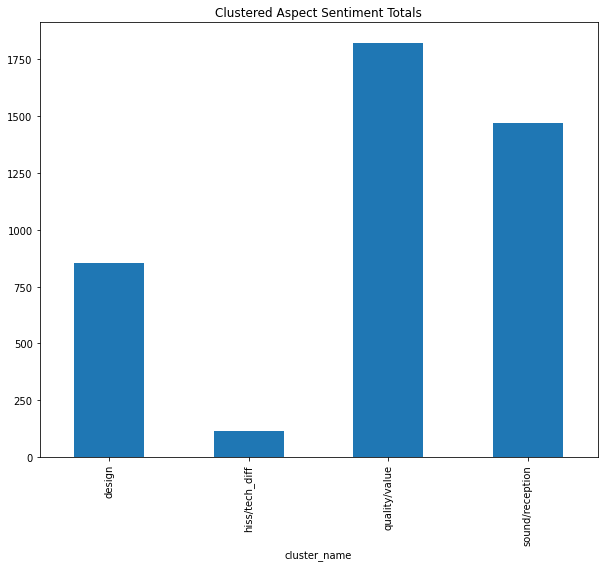

In [23]:
df_senti = get_cluster_name_inputs(df_senti)


headphone_design



headphones     2382
noise           460
batteries       432
headset         425
headphone       289
signal          259
static          228
unit            213
cradle          206
phones          188
base            156
fit             150
audio           135
light           133
station         118
output          107
headsets         97
tuning           96
setup            84
device           82
frequency        81
earphones        80
Headphones       78
pads             78
transmitter      76
controls         75
channels         74
speakers         65
screen           65
battery          63
Name: asp, dtype: int64


headphone_design



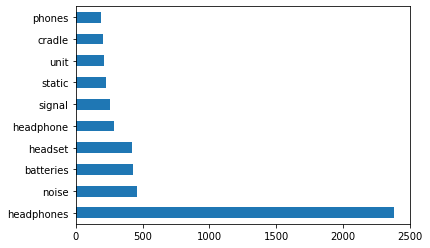

In [24]:
print('\nheadphone_design\n')
display(df_senti.loc[df_senti['cluster_name'] == 'design', 'asp'].value_counts()[:30])
print('\nheadphone_design\n')
df_senti.loc[df_senti['cluster_name'] == 'design', 'asp'].value_counts()[:10].plot.barh();

## Loading Turk Data

<code style="background:yellow;color:black">The DataFrames below are batch results loaded as csv files submitted from Amazon Turk. As stated before, there are a total of 6107 non-null entries with information for 1438 unqiue aspects, submitted from a total of410 different workers from around the globe. Duplicate pairs of aspect/opinion pairs were included to inspect variance of submission from human labels and machine labels for each opinion pair.</code>

In [25]:
#Read all Turk Data

df1 = pd.read_csv("data/batch1_results.csv")
df2 = pd.read_csv("data/batch2_results.csv")
df3 = pd.read_csv("data/batch3_results.csv")
df4 = pd.read_csv("data/batch4_results.csv")
# df_lab = pd.read_csv("data/locally_sourced_labels.csv")

display(df1.info())
display(df2.info())
display(df3.info())
display(df4.info())
# df_lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   HITId                        1020 non-null   object 
 1   HITTypeId                    1020 non-null   object 
 2   Title                        1020 non-null   object 
 3   Description                  1020 non-null   object 
 4   Keywords                     1020 non-null   object 
 5   CreationTime                 1020 non-null   object 
 6   MaxAssignments               1020 non-null   int64  
 7   RequesterAnnotation          1020 non-null   object 
 8   AssignmentDurationInSeconds  1020 non-null   int64  
 9   AutoApprovalDelayInSeconds   1020 non-null   int64  
 10  Expiration                   1020 non-null   object 
 11  NumberOfSimilarHITs          0 non-null      float64
 12  LifetimeInSeconds            0 non-null      float64
 13  AssignmentId      

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   HITId                        153 non-null    object 
 1   HITTypeId                    153 non-null    object 
 2   Title                        153 non-null    object 
 3   Description                  153 non-null    object 
 4   Keywords                     153 non-null    object 
 5   CreationTime                 153 non-null    object 
 6   MaxAssignments               153 non-null    int64  
 7   RequesterAnnotation          153 non-null    object 
 8   AssignmentDurationInSeconds  153 non-null    int64  
 9   AutoApprovalDelayInSeconds   153 non-null    int64  
 10  Expiration                   153 non-null    object 
 11  NumberOfSimilarHITs          0 non-null      float64
 12  LifetimeInSeconds            0 non-null      float64
 13  AssignmentId        

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921 entries, 0 to 1920
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   HITId                        1921 non-null   object 
 1   HITTypeId                    1921 non-null   object 
 2   Title                        1921 non-null   object 
 3   Description                  1921 non-null   object 
 4   Keywords                     1921 non-null   object 
 5   CreationTime                 1921 non-null   object 
 6   MaxAssignments               1921 non-null   int64  
 7   RequesterAnnotation          1921 non-null   object 
 8   AssignmentDurationInSeconds  1921 non-null   int64  
 9   AutoApprovalDelayInSeconds   1921 non-null   int64  
 10  Expiration                   1921 non-null   object 
 11  NumberOfSimilarHITs          0 non-null      float64
 12  LifetimeInSeconds            0 non-null      float64
 13  AssignmentId      

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3229 entries, 0 to 3228
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   HITId                        3229 non-null   object 
 1   HITTypeId                    3229 non-null   object 
 2   Title                        3229 non-null   object 
 3   Description                  3229 non-null   object 
 4   Keywords                     3229 non-null   object 
 5   CreationTime                 3229 non-null   object 
 6   MaxAssignments               3229 non-null   int64  
 7   RequesterAnnotation          3229 non-null   object 
 8   AssignmentDurationInSeconds  3229 non-null   int64  
 9   AutoApprovalDelayInSeconds   3229 non-null   int64  
 10  Expiration                   3229 non-null   object 
 11  NumberOfSimilarHITs          0 non-null      float64
 12  LifetimeInSeconds            0 non-null      float64
 13  AssignmentId      

None

In [26]:
#concact turk data into one dataframe
#keep only necessary columns

df_turk = pd.concat([df1,df2,df3, df4])

num_turk = len(df_turk.WorkerId.unique())
print(f'Total number of Turk Workers: {num_turk}\n')

df_turk = df_turk.loc[:, ['Input.Modifier', 'Input.Aspect',  'Answer.sentiment.label']]
df_turk.dropna(inplace=True)

num_aspects = len(df_turk["Input.Aspect"].unique())
print(f'Total number of Unique Aspects: {num_aspects}\n')

display(df_turk.info())

#rename to differentiate human labels
df_turk.rename({'Input.Modifier': 'modifier', 
                        'Input.Aspect': 'asp',
                        'Answer.sentiment.label': 'sentiment_h'
                       }, axis=1, inplace=True)



df_turk.sort_values(by='asp')

Total number of Turk Workers: 410

Total number of Unique Aspects: 1438

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6107 entries, 0 to 3228
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Input.Modifier          6107 non-null   object
 1   Input.Aspect            6107 non-null   object
 2   Answer.sentiment.label  6107 non-null   object
dtypes: object(3)
memory usage: 190.8+ KB


None

,modifier,asp,sentiment_h
32,extra,$,Very Positive
115,more missing,1/2,Negative
646,single,1/8,Neutral
1659,stereo,1/8\\,Neutral
589,new,120s,Positive
...,...,...,...
3042,pair,years,Neutral
1031,plus,years,Positive
1878,past,years,Positive
2296,fake,youout,Very Negative


In [27]:
#create aspect/opinion pair to
#compare machine label vs human
df_turk['tup_pair'] = list(zip(df_turk['modifier'],df_turk['asp']))
display(df_turk.info())
df_senti_predicted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6107 entries, 0 to 3228
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   modifier     6107 non-null   object
 1   asp          6107 non-null   object
 2   sentiment_h  6107 non-null   object
 3   tup_pair     6107 non-null   object
dtypes: object(4)
memory usage: 238.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35355 entries, 0 to 7875
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   modifier            35355 non-null  object 
 1   asp                 35355 non-null  object 
 2   modifier_sentiment  35355 non-null  float64
 3   sentiment           35355 non-null  object 
 4   tup_pair            35355 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


# Results

In [28]:
#create merged DataFrame
#in order to compare human
#labeled aspect/opinion sentiment
#vs model aspect/opinion sentiment
#can check accuracy and precision

#how much do Turk workers agree with
#my model?

#How much do Turk workers agree with
#each other?

df_results = pd.merge(df_turk,
                      df_senti_predicted,
                      on='tup_pair',
                      how='left'
                     )

df_results.drop_duplicates(subset='tup_pair', inplace=True)
df_results.head()

,modifier_x,asp_x,sentiment_h,tup_pair,modifier_y,asp_y,modifier_sentiment,sentiment
0,old,father,Neutral,"(old, father)",old,father,0.0,Neutral
16,wireless,headphones,Neutral,"(wireless, headphones)",wireless,headphones,0.0,Neutral
748,charging,rack,Neutral,"(charging, rack)",charging,rack,0.0,Neutral
752,also available,headphones,Very Positive,"(also available, headphones)",also available,headphones,0.0,Neutral
753,impaired,husband,Negative,"(impaired, husband)",impaired,husband,0.0,Neutral


In [29]:
display(df_results.sentiment_h.value_counts())
df_results.sentiment.value_counts()

Positive         1860
Neutral          1521
Very Positive     790
Negative          692
Very Negative     223
Name: sentiment_h, dtype: int64

Neutral          3309
Positive          763
Very Positive     523
Negative          397
Very Negative      88
Name: sentiment, dtype: int64

In [30]:
df_results2 = df_results.reset_index(drop=True)
df_results2.dropna(inplace=True)

matching_predictions = df_results2.loc[df_results2['sentiment_h'] == df_results2['sentiment']]
mismatching_predictions = df_results2.loc[df_results2['sentiment_h'] != df_results2['sentiment']]

display(matching_predictions.sentiment.value_counts())
mismatching_predictions.sentiment.value_counts()

Neutral          1198
Positive          394
Very Positive     187
Negative          141
Very Negative      21
Name: sentiment, dtype: int64

Neutral          2111
Positive          369
Very Positive     336
Negative          256
Very Negative      67
Name: sentiment, dtype: int64

In [94]:
#create table to see accuracy and precision of extractor
#AS COMPARED TO MY AMAZON TURK HUMAN LABELS
#ARE MY HUMAN LABELS RELIABLE????

agree = matching_predictions.sentiment.value_counts().values 
disagree = mismatching_predictions.sentiment.value_counts().values 
total_arr = agree + disagree
precision = agree/total_arr
denom = 5*[5080]
accuracy = agree/denom
columns = matching_predictions.sentiment.value_counts().index
df_table = pd.DataFrame(data=[precision, accuracy], columns=columns)
df_table = df_table.apply(lambda x: round(x,4))
df_table.rename({0: 'precision', 1: 'accuracy'},
                inplace = True
               )

df_table.to_csv("data/acc_prec_table.csv", index=False)

df_table.head()

,Neutral,Positive,Very Positive,Negative,Very Negative
precision,0.3620,0.5164,0.3576,0.3552,0.2386
accuracy,0.2358,0.0776,0.0368,0.0278,0.0041


![Results Table](images/results_table2.jpg)

The precision values explain how many times the machine label correctly line up with the human labels for each aspect/opinion pair when guessing for that appropriate sentiment. That is, if the machine were to guess only for negative sentiment, it was in agreement with humans 35% of the time. The accuracy scores represent how many times the machine were right overall for the entire dataset when predicted a certain class. Due to the nature of the dataset, accuracy scores will be low for a lot of the classes strictly because of class imbalances. Therefore, precision is a better metric for judging the performance of my model. However, there were some major issues with the overal expiremental setup that need to be discussed and anaylzed. 

#### Reliability of Experimental Setup

To quickly visualize the variance among the different Amazon Turk workers assigned to labeling the aspect/opinion pairs, a function was utilized to create a bargraph that displays the different labels each worker voted for each aspect/opinion set that appeared in the dataset more than 10 times. A more statistical approach will be carried out using sum of squares residuals further down in the notebook. It is very apparent that the Amazon turks had a lot of trouble coming to any agreement on sentiment. The task was setup to reward workers to label data as quickly as possible without much safeguard to the quality of the work being submitted other than a quick overview by myself.I am just one poorly funded individual. Without proper funding from a research grant it was dificult to setup a reliable expirement. This cast a large shadow of doubt on the reliabilty of this data to be used as a way to reliably test the accuarcy of my model. In comparison, you can see that the extractor chooses the same sentiment for a unique aspect/opinion pair every single time it shows up in the dataset. While the human data has been revealed to be severely flawed, it has brought up a shining example as to why machine learning may be a better substitute for labeling large amounts of tedius data in the first place.

In [32]:
#create dataframe for tuple_pairs with more than 10 votes from turk dataframe

multi_votes = df_turk['tup_pair'].value_counts()[df_turk['tup_pair'].value_counts() > 10].index

df_turk2 = df_turk[df_turk["tup_pair"].isin(multi_votes)].copy()

df_turk2.rename({'sentiment_h': 'sentiment'}, 
                axis=1, 
                inplace=True
               )

unique_tup = df_turk2.tup_pair.unique()



#create dataframe for tuple_pairs with more than 10 votes from extractor dataframe 

multi_votes_e = df_senti_predicted['tup_pair'].value_counts()[df_senti_predicted['tup_pair'].value_counts() > 10].index

df_ex = df_senti_predicted[df_senti_predicted["tup_pair"].isin(multi_votes_e)].copy()

unique_tup_e = df_ex.tup_pair.unique()

## Partition Sum Of Squares to Measure Disperson of Turk Data

[Partition Sum of Squares](https://en.wikipedia.org/wiki/Partition_of_sums_of_squares)


For simplicity, sum of square statistical measurements were calculated for each aspect in the human labeled data as well as the machine labeled data that had more than 10 votes. This was chosen over entropy as a calculation for dispersion as the "sum of squares" for these data is a close enough estimate for the variance in categorical data for this expirement. Every single human labeled aspect with multiple aspects had a non-zero value for residual sum of squares, while every machine labeled aspect had zero residual error. This shows the difference in variance statistically and mathmatically very clearly between the two and shows the unreliability of the turk data. See the figure below for the total range in the residual sum of square values for the tested aspects in each group.

/Users/dylandey/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


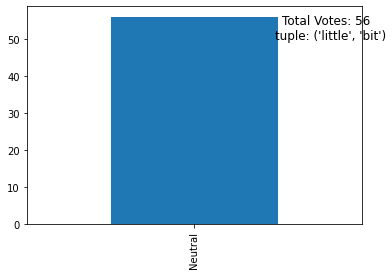

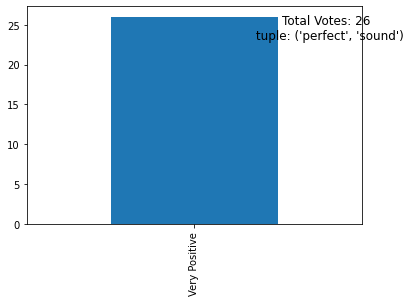

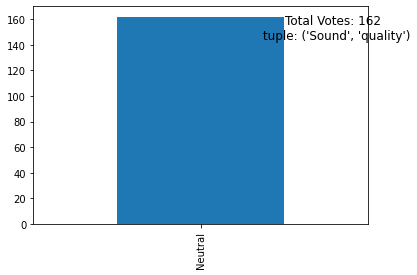

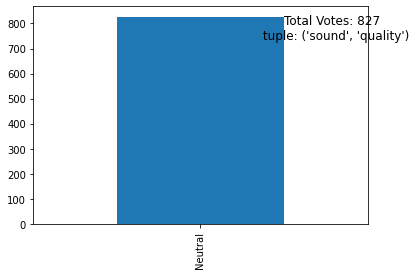

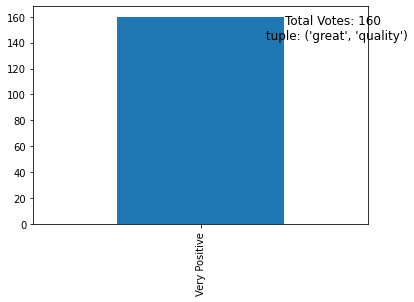

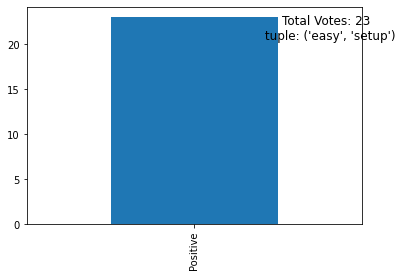

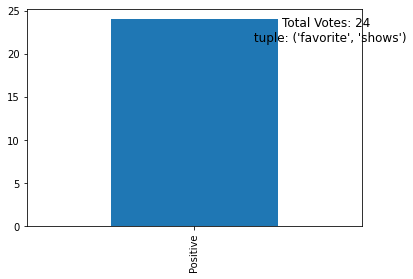

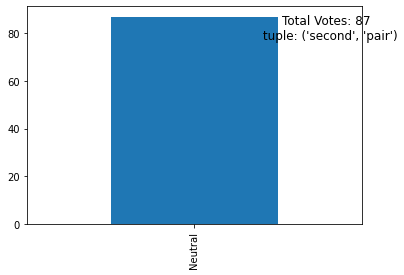

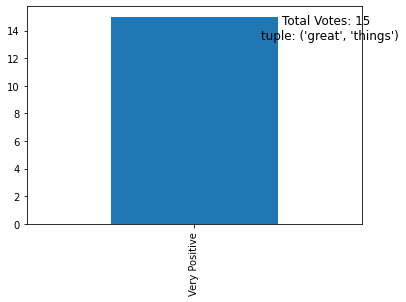

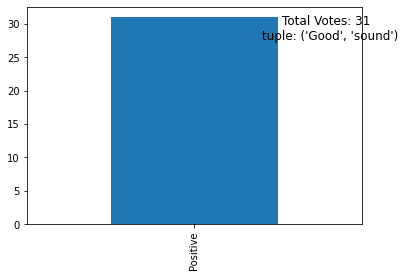

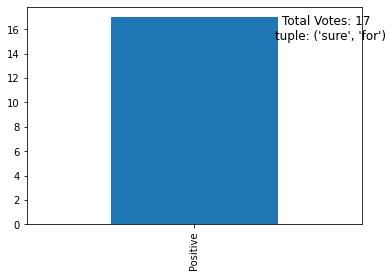

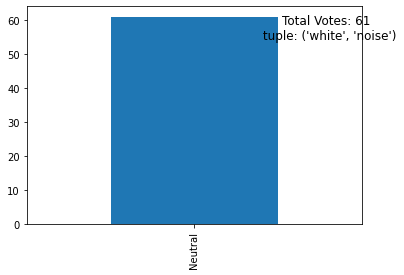

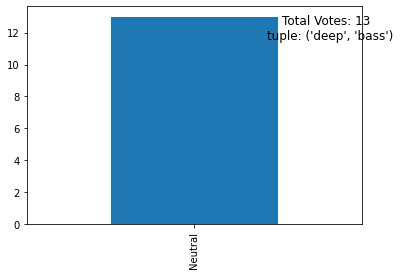

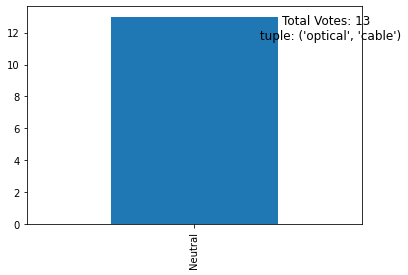

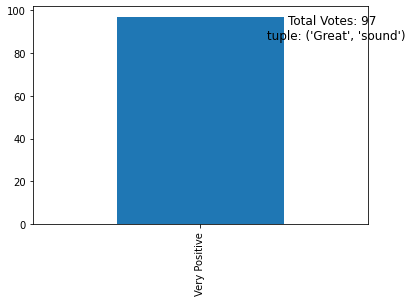

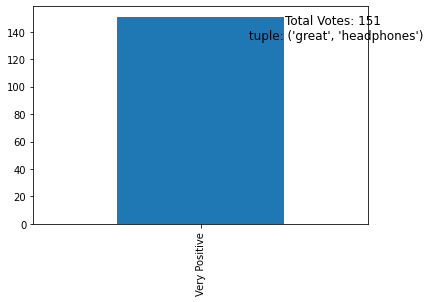

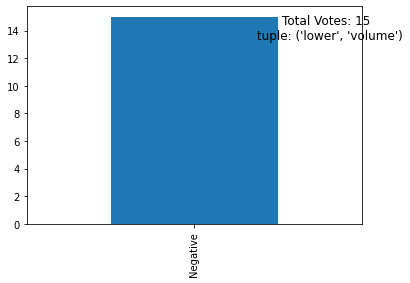

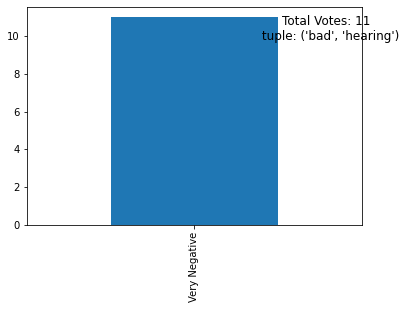

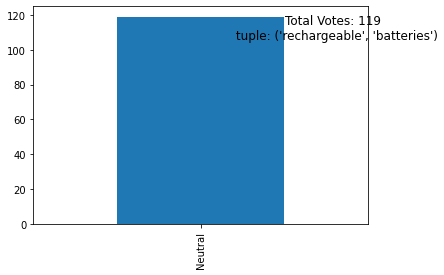

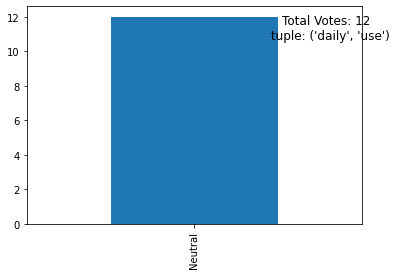

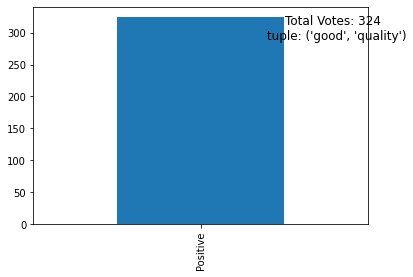

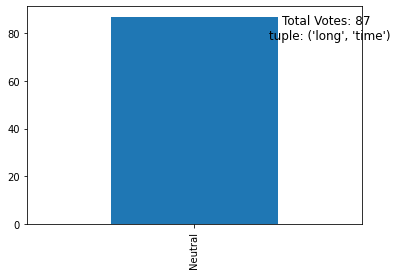

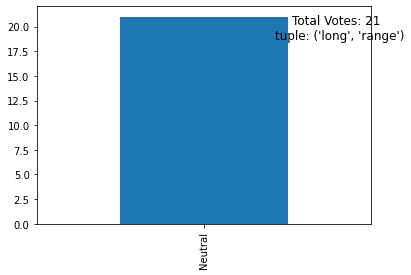

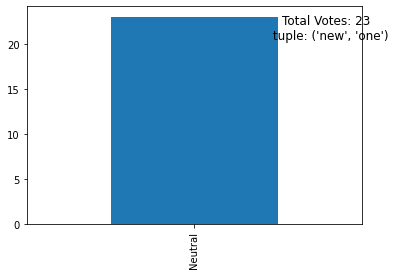

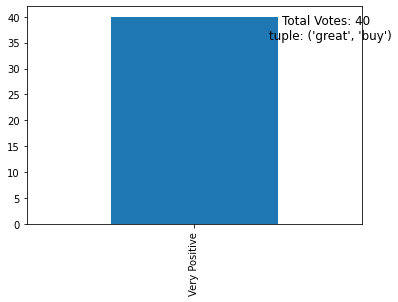

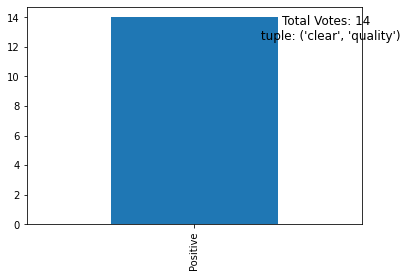

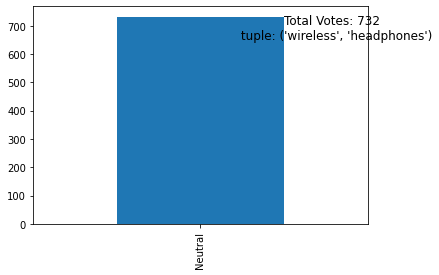

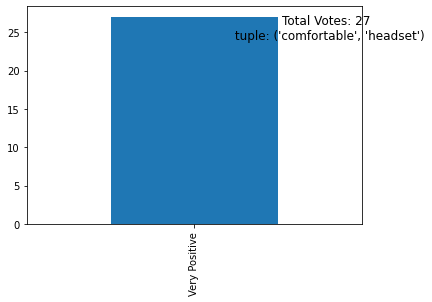

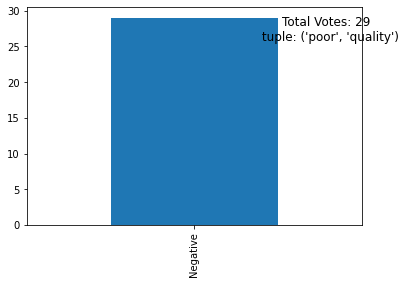

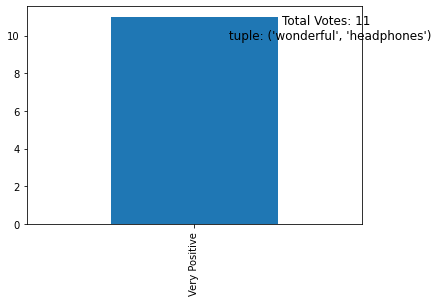

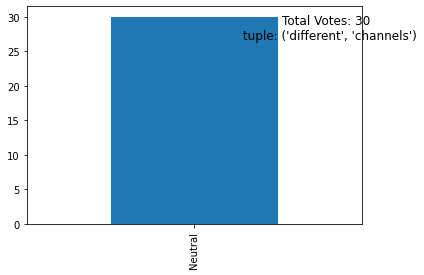

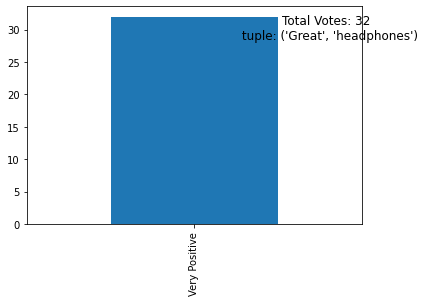

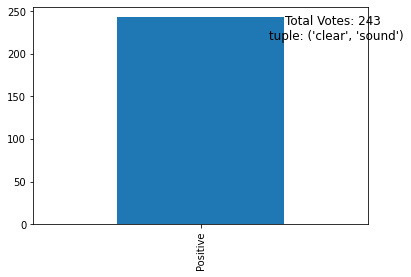

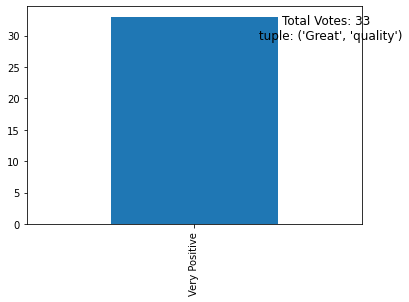

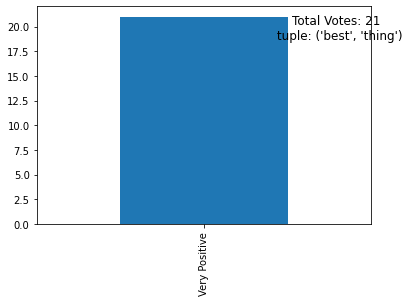

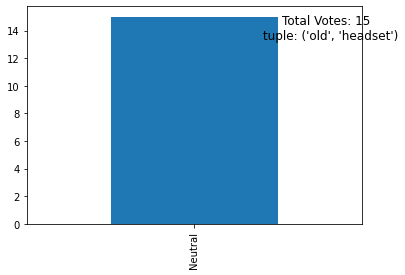

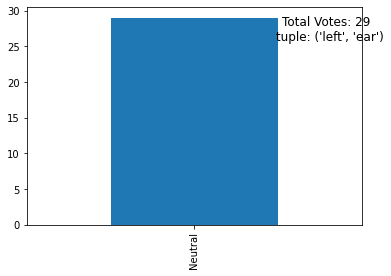

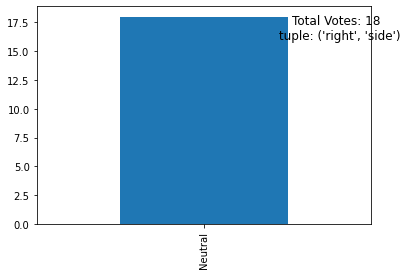

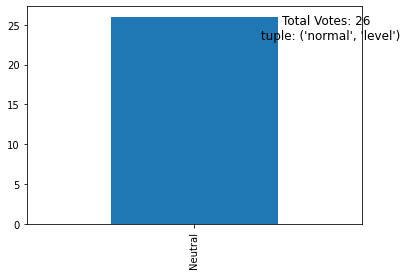

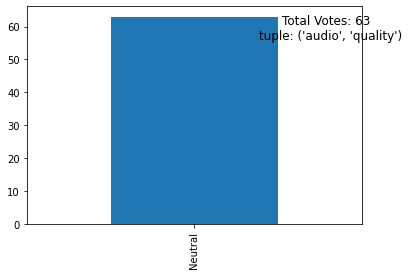

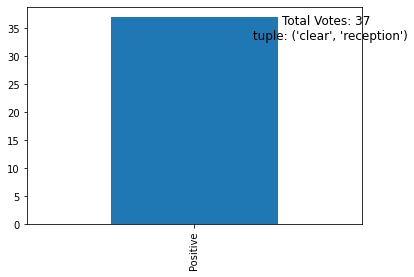

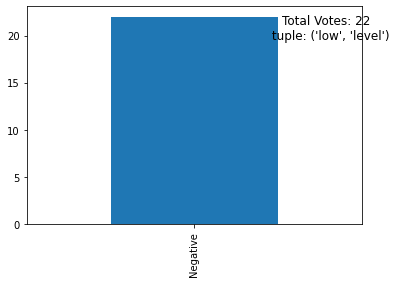

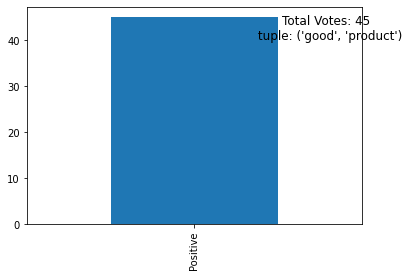

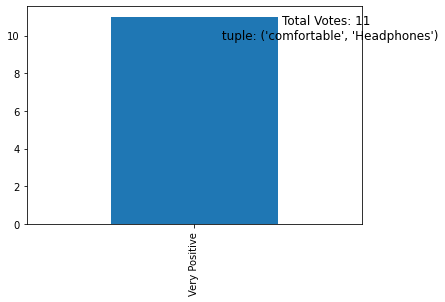

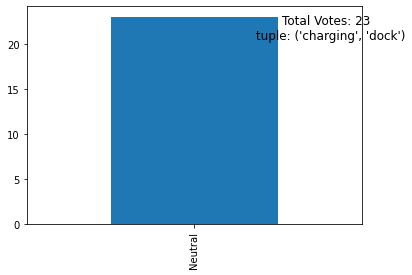

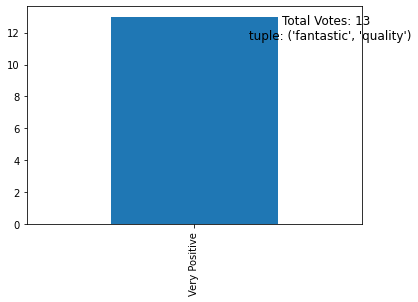

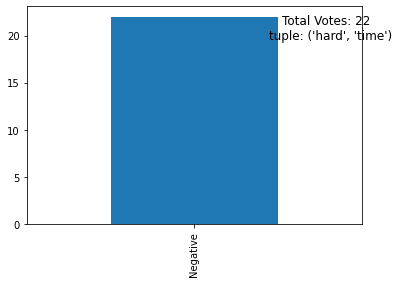

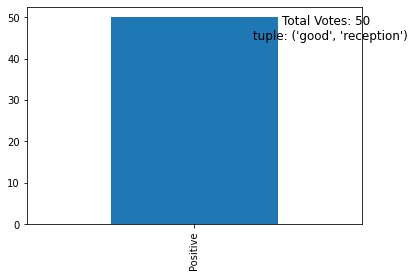

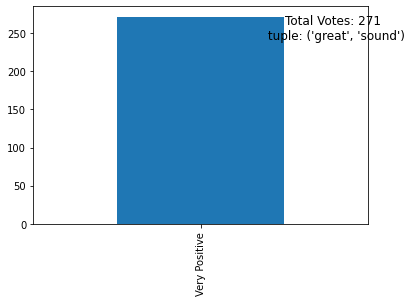

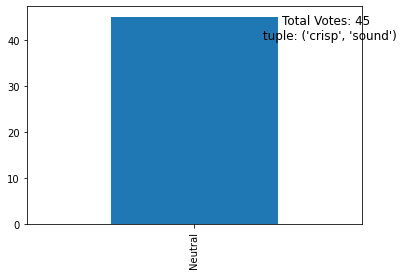

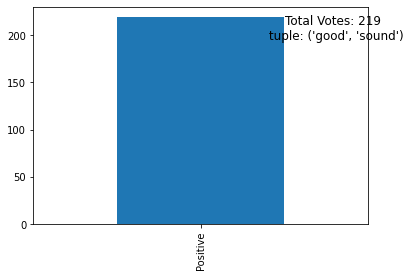

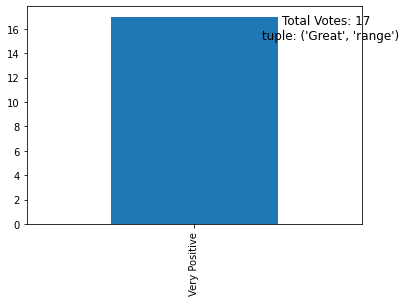

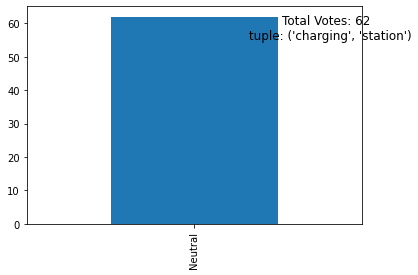

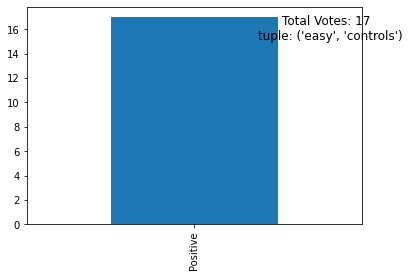

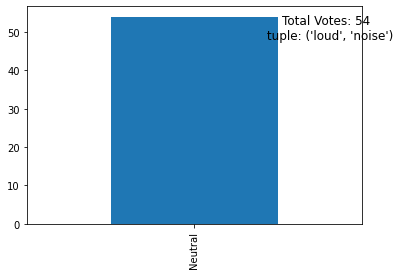

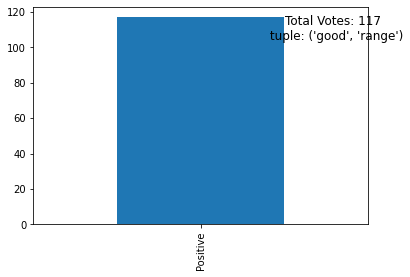

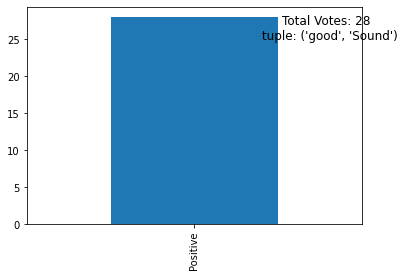

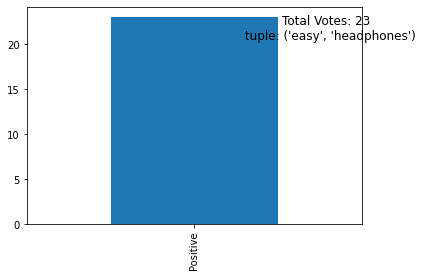

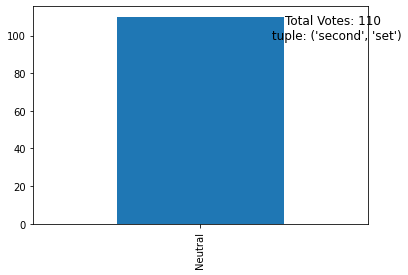

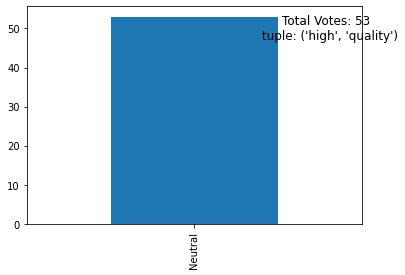

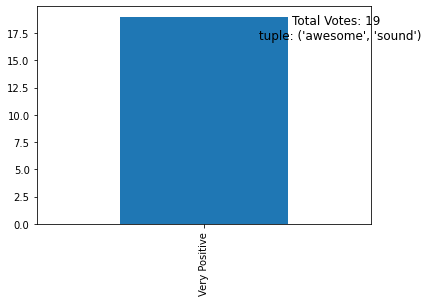

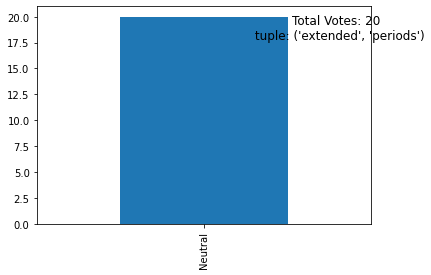

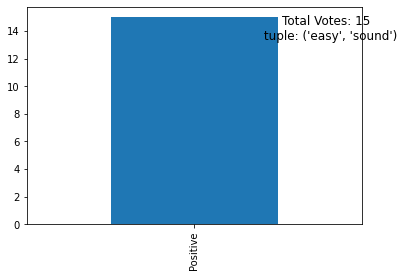

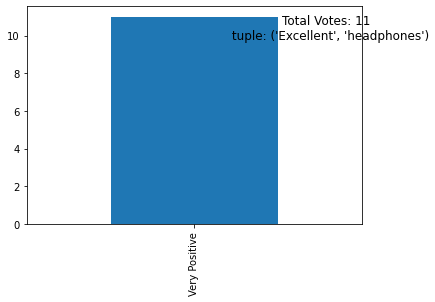

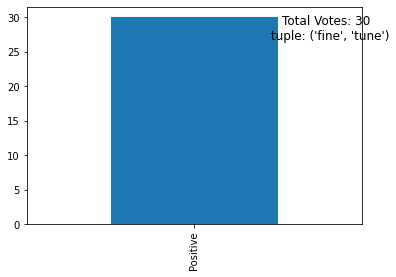

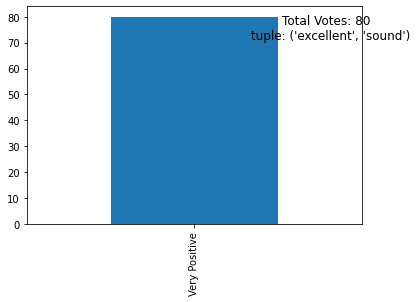

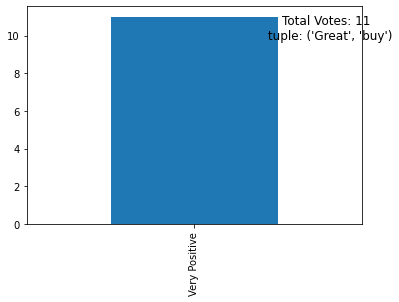

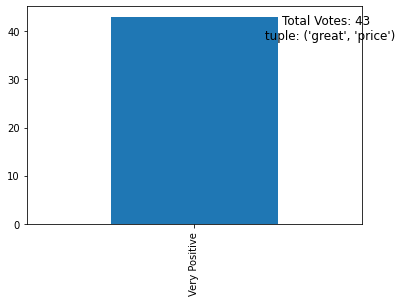

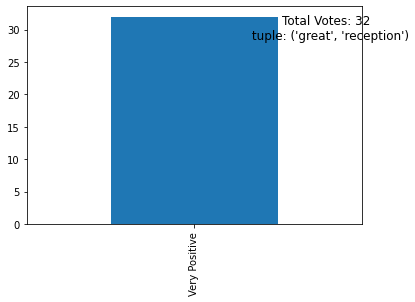

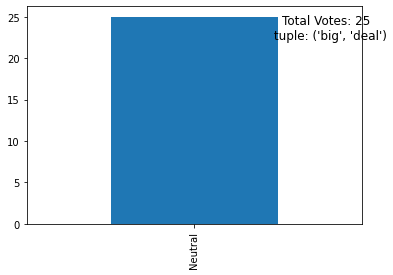

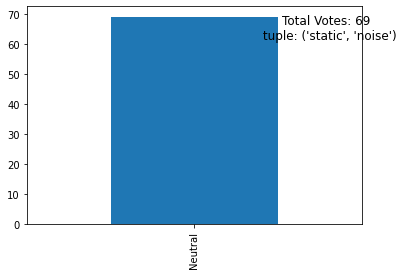

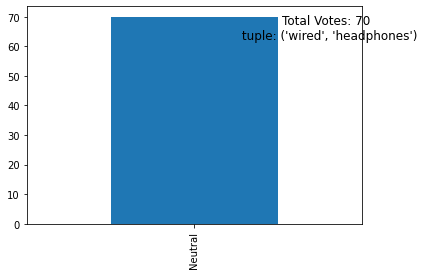

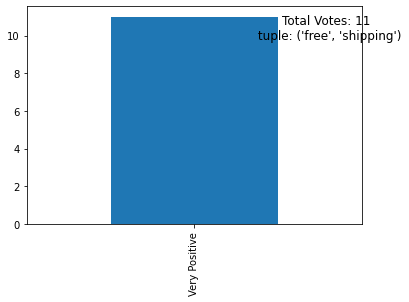

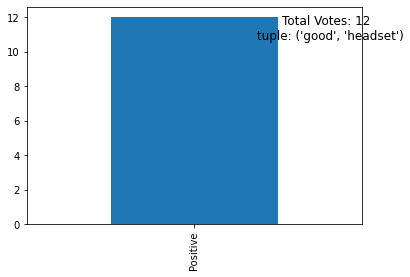

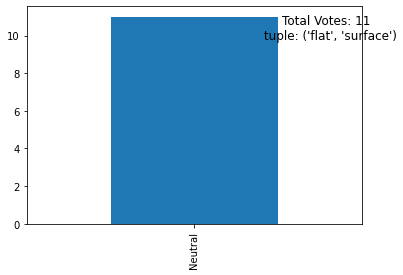

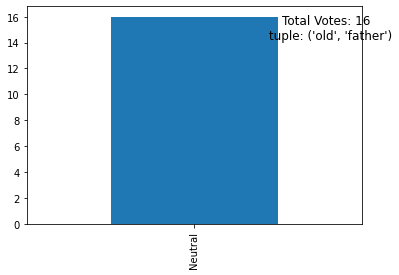

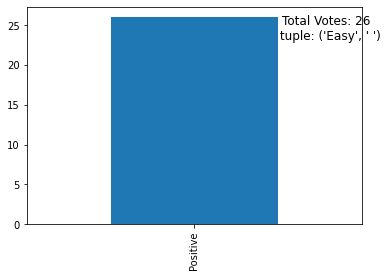

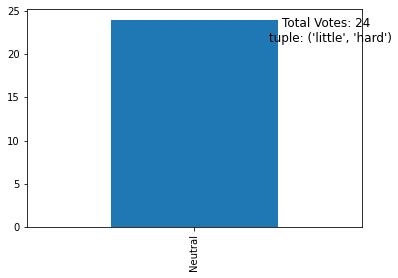

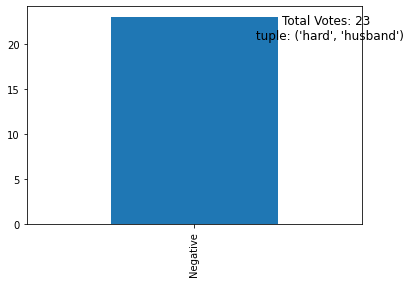

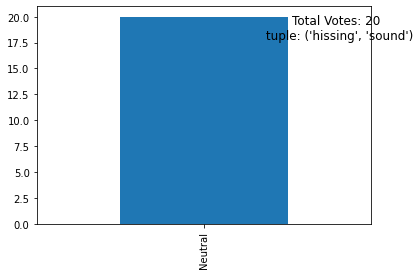

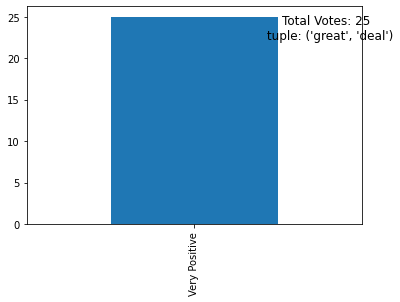

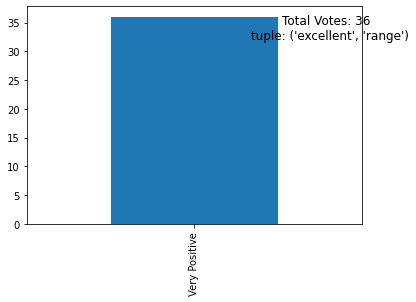

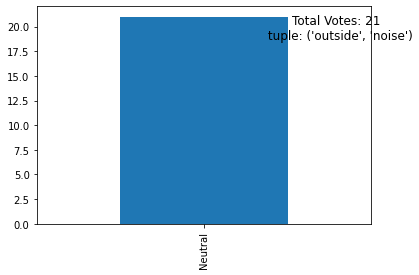

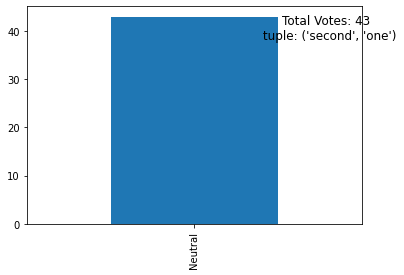

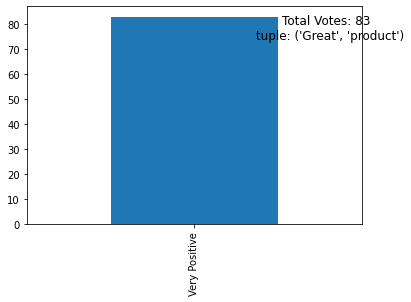

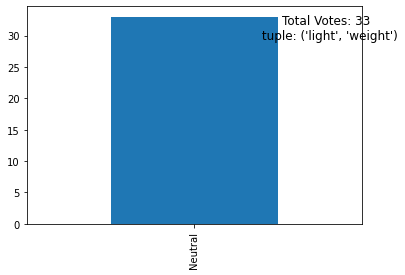

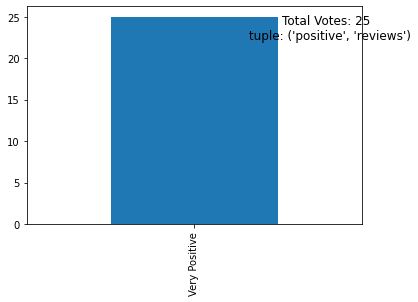

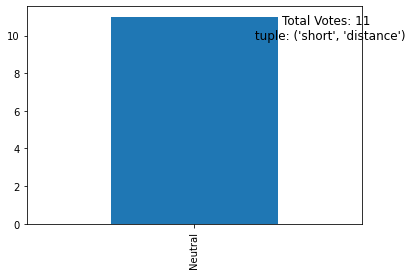

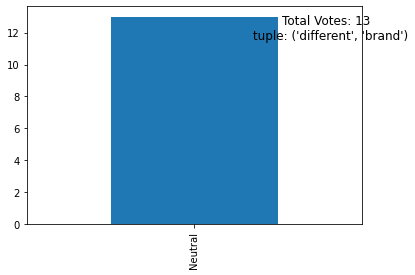

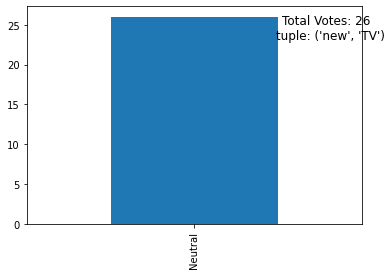

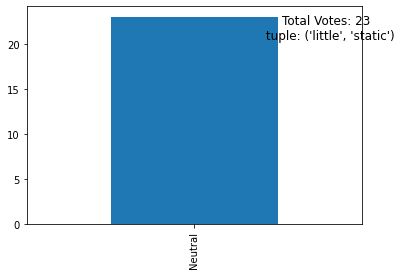

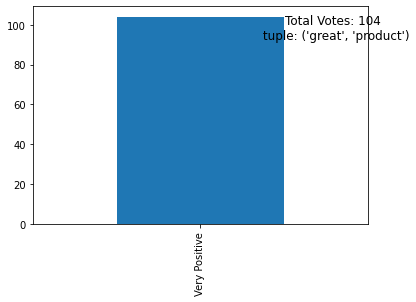

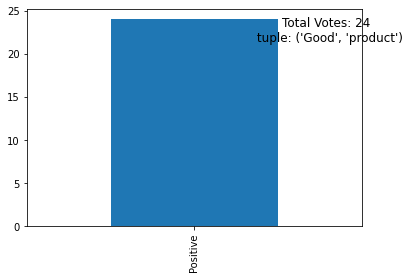

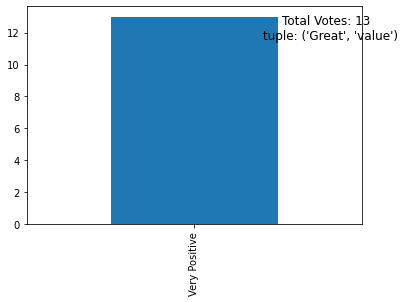

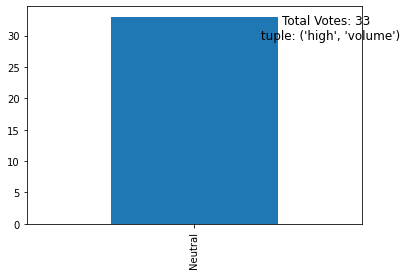

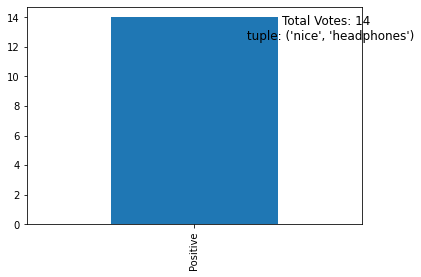

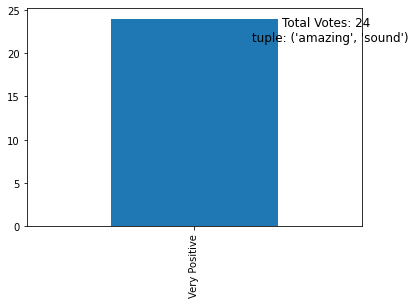

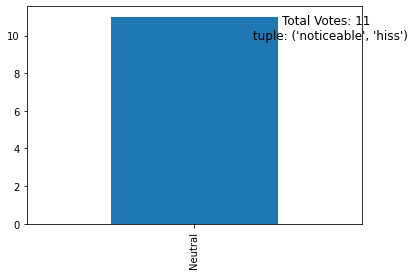

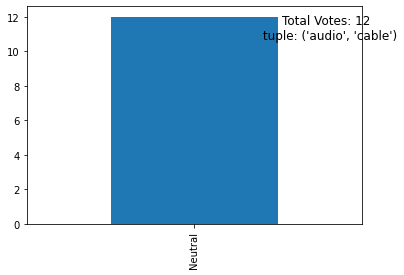

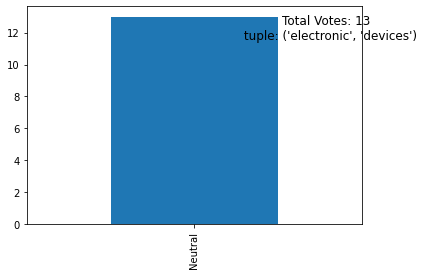

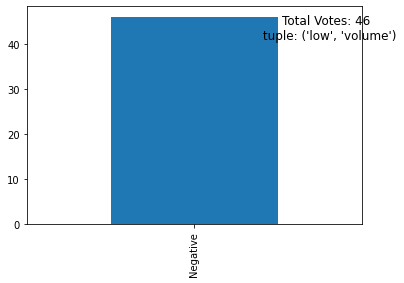

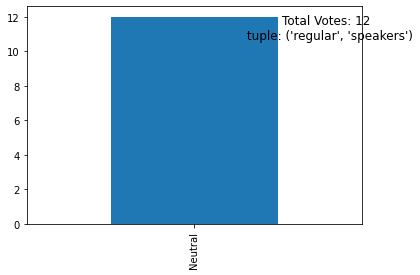

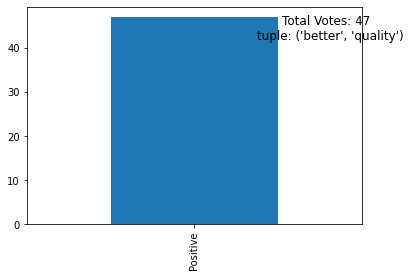

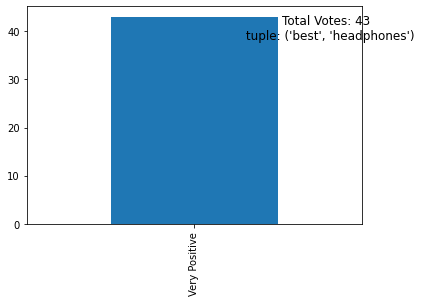

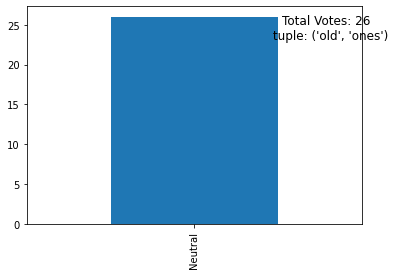

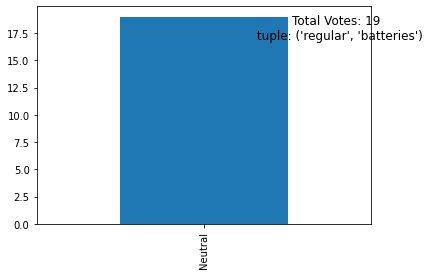

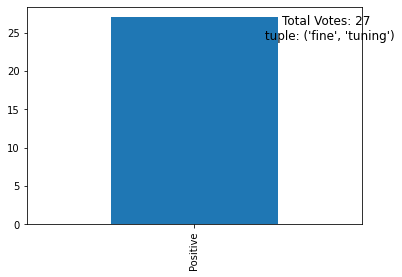

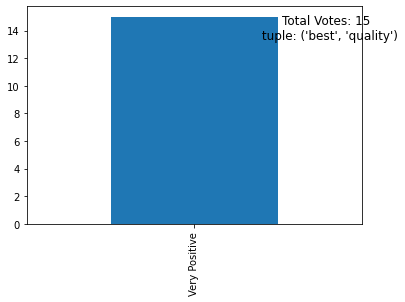

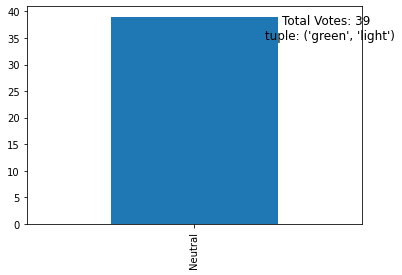

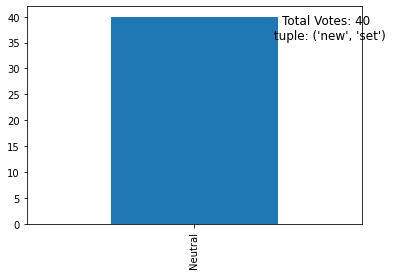

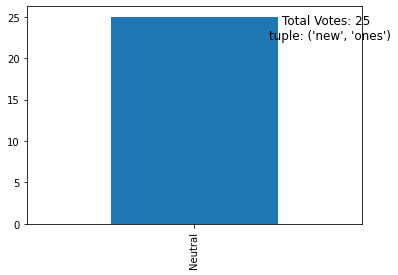

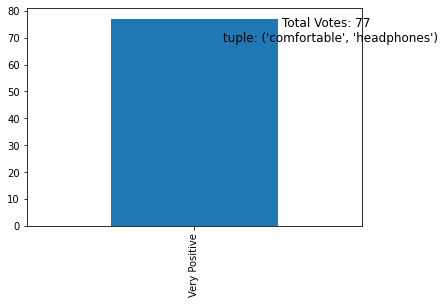

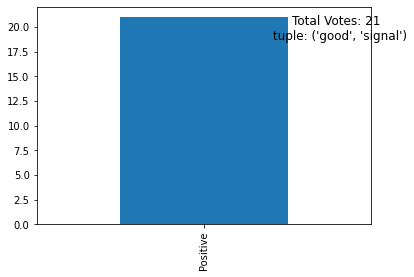

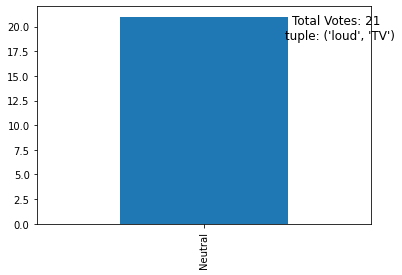

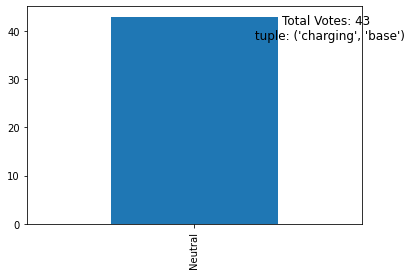

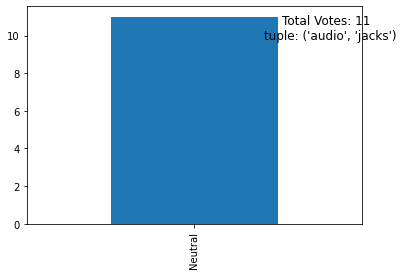

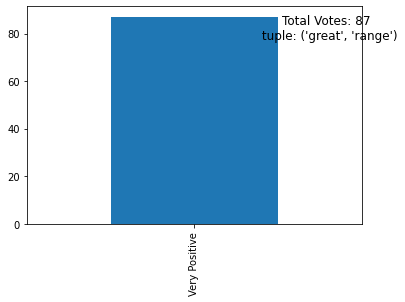

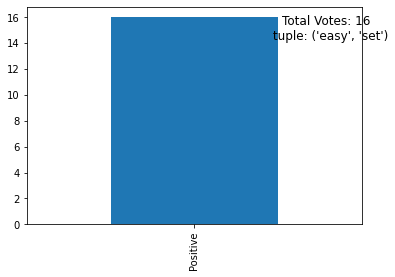

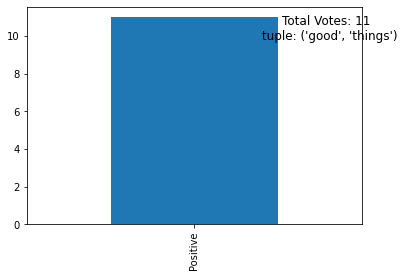

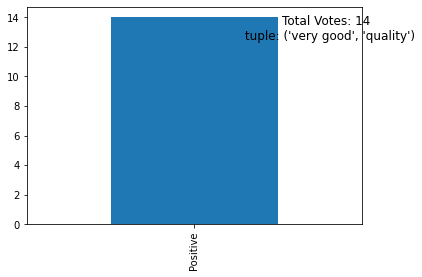

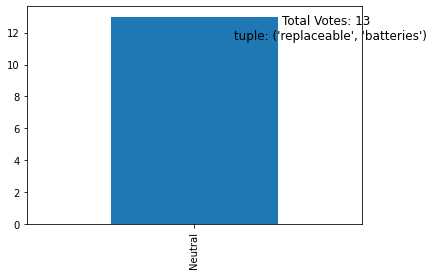

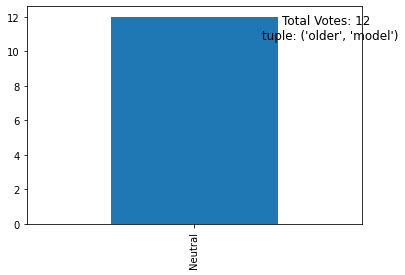

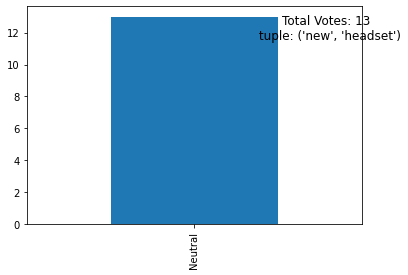

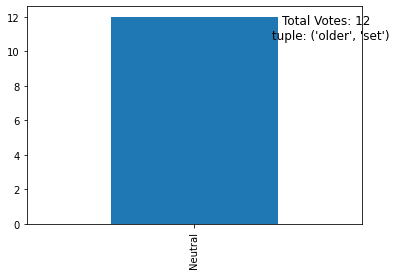

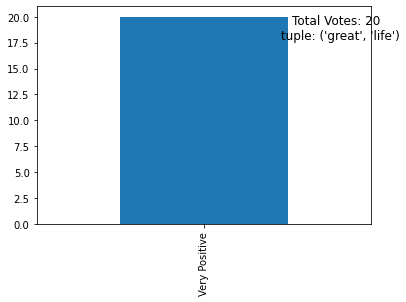

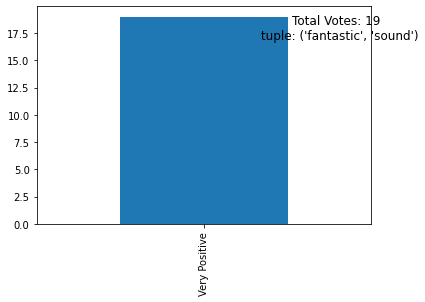

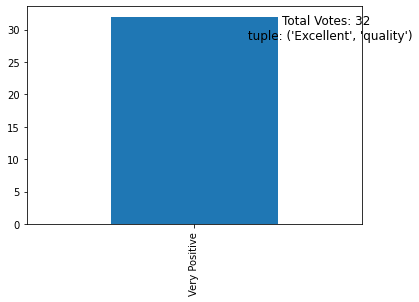

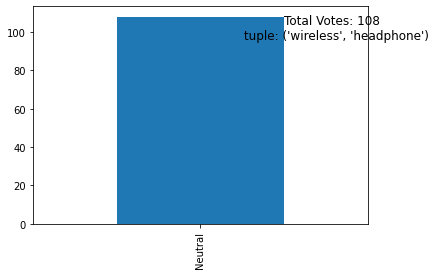

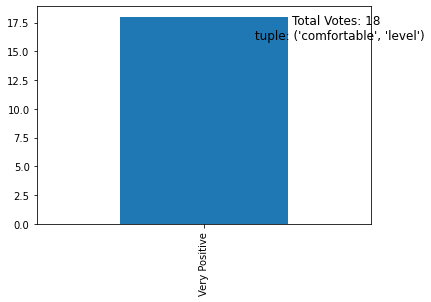

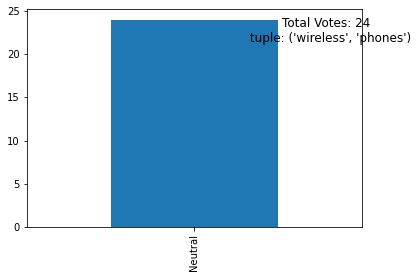

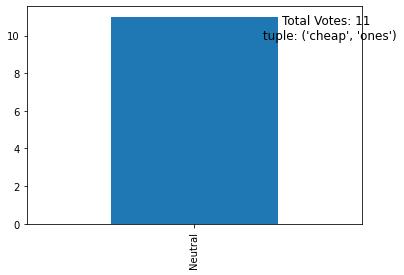

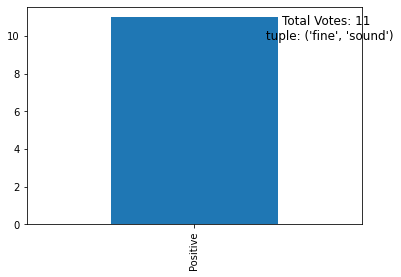

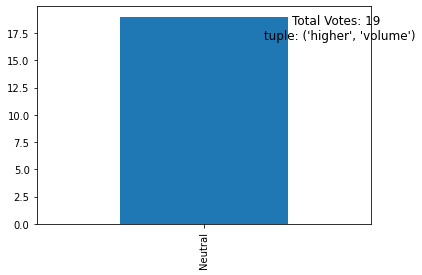

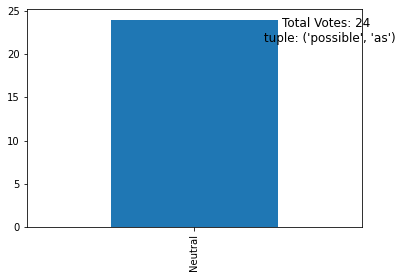

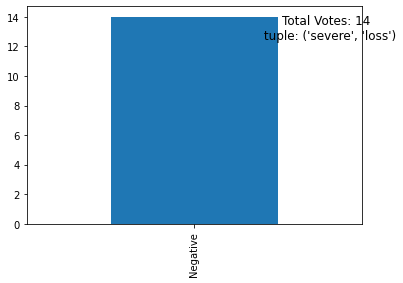

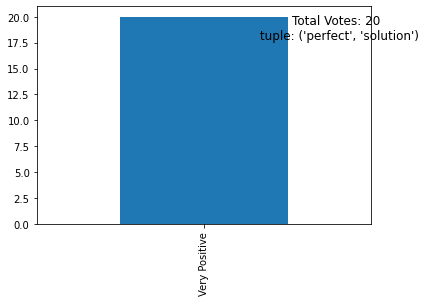

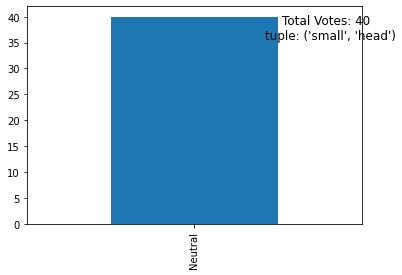

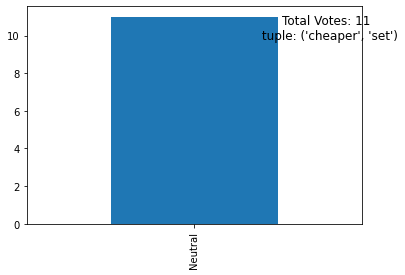

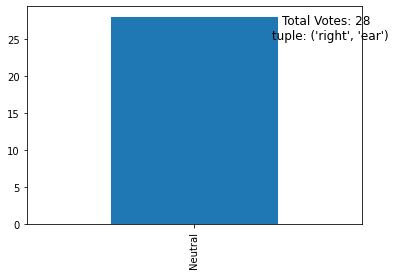

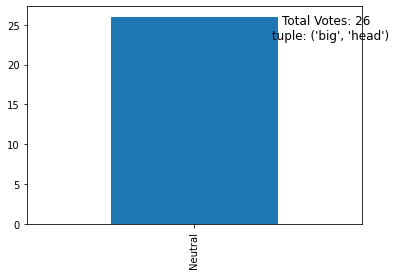

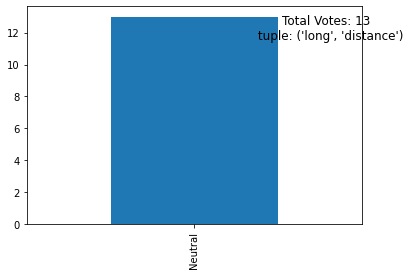

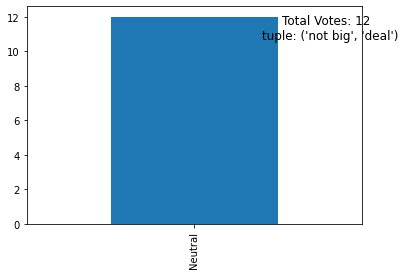

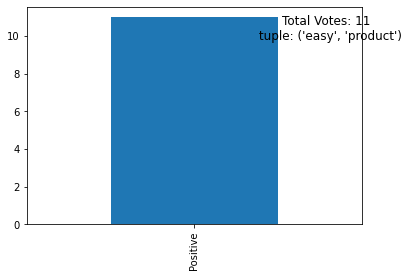

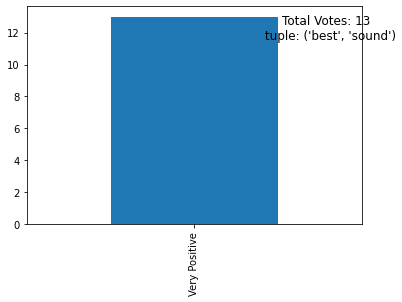

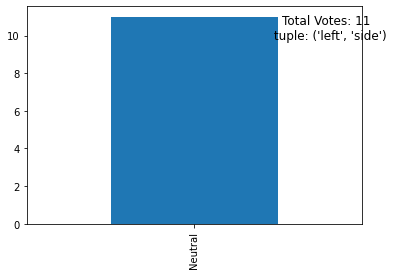

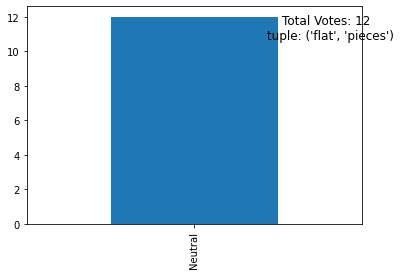

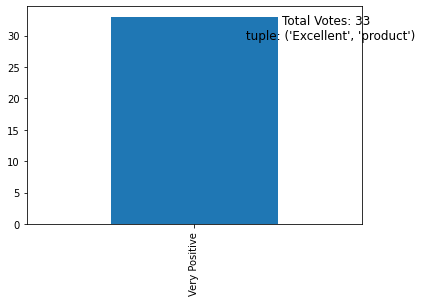

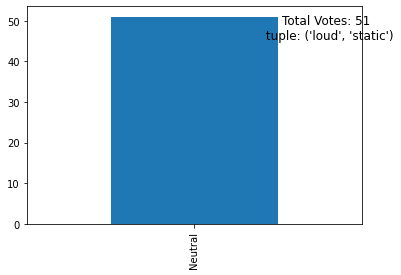

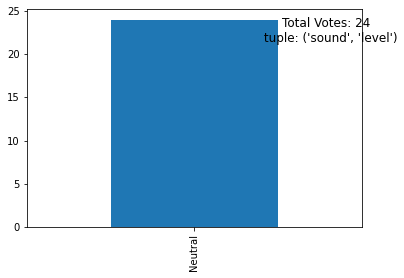

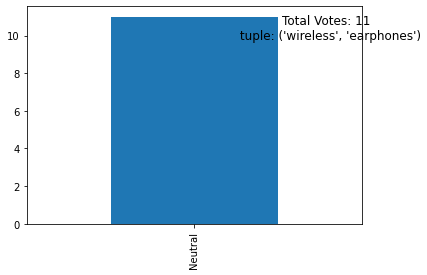

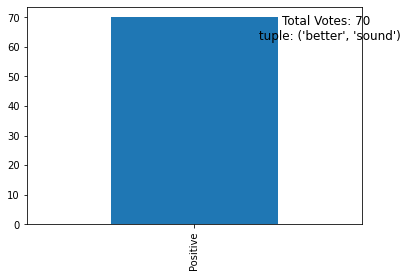

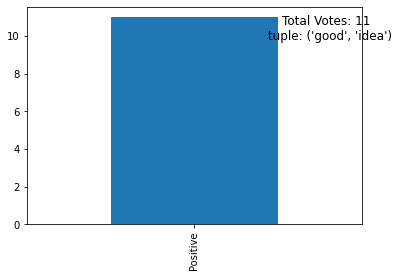

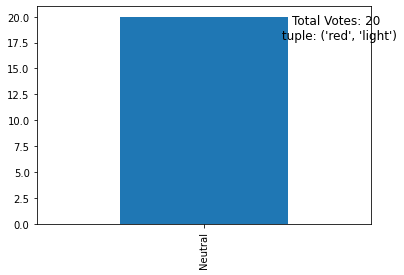

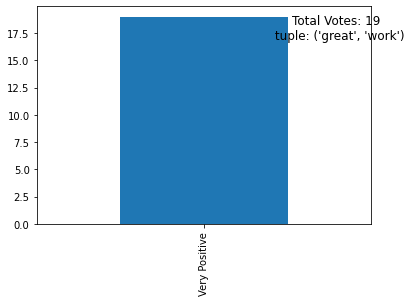

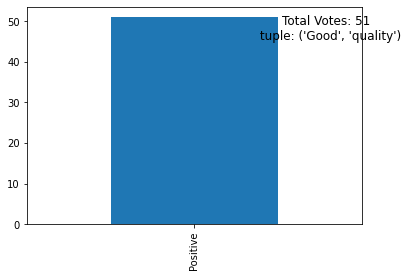

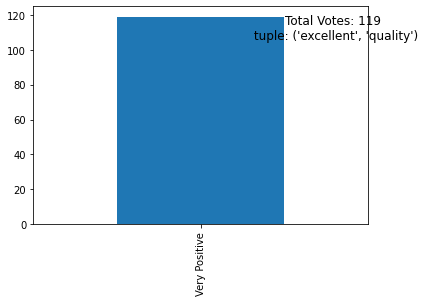

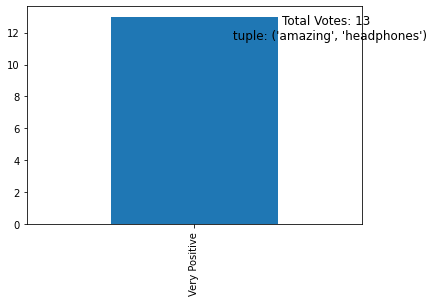

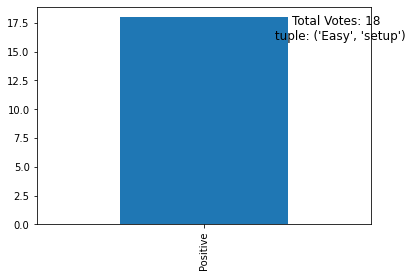

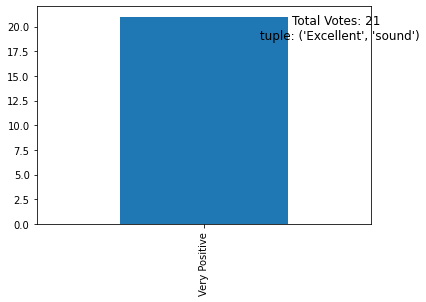

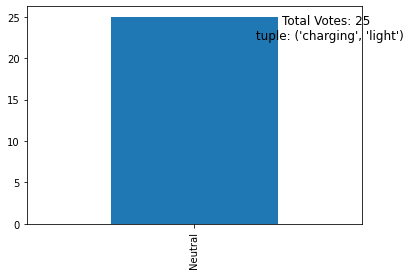

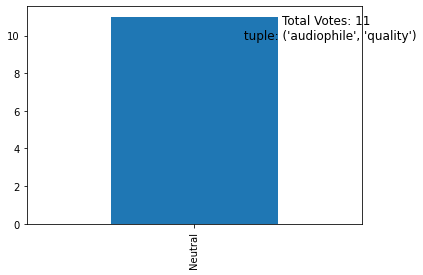

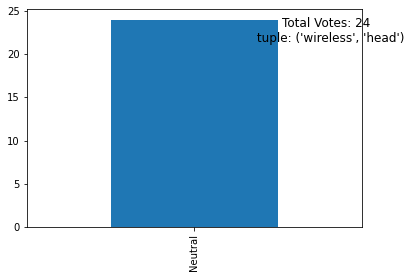

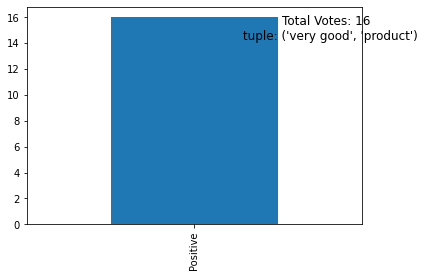

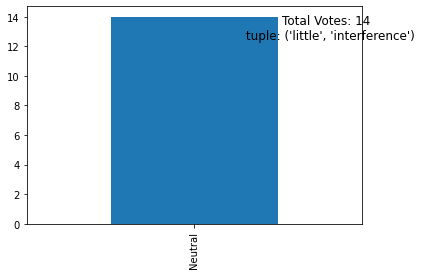

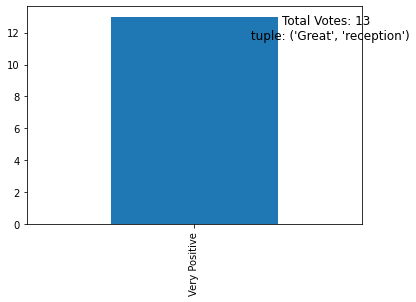

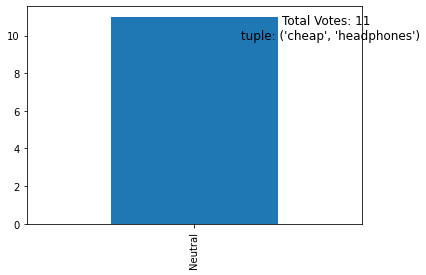

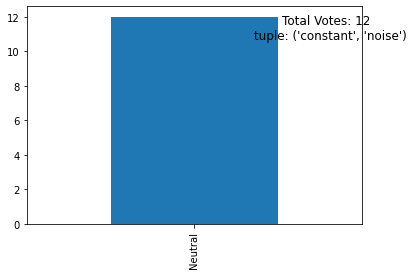

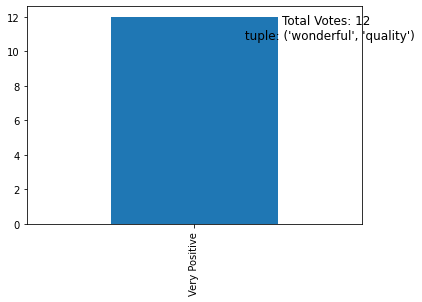

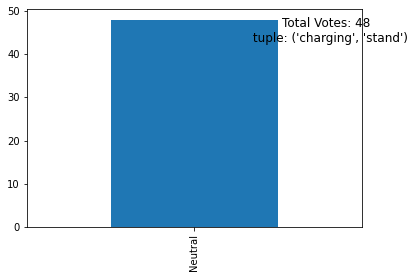

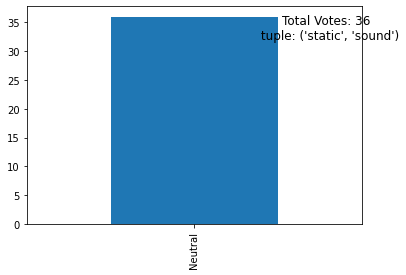

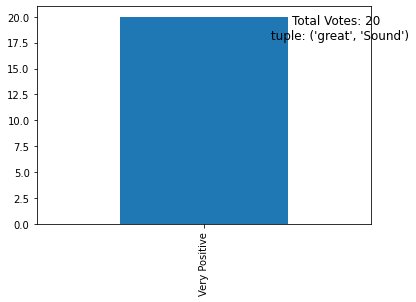

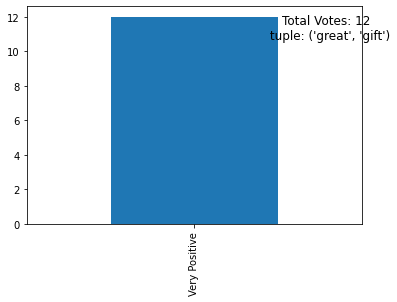

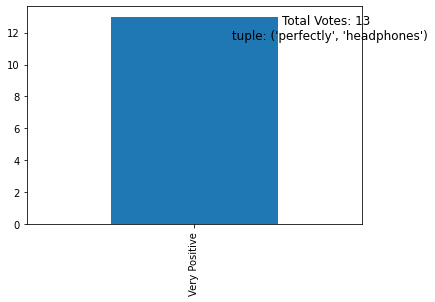

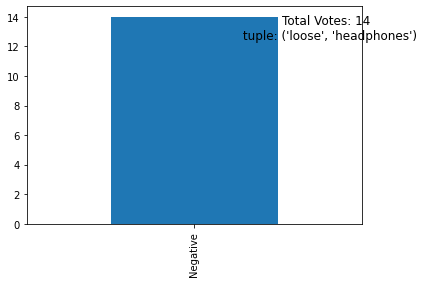

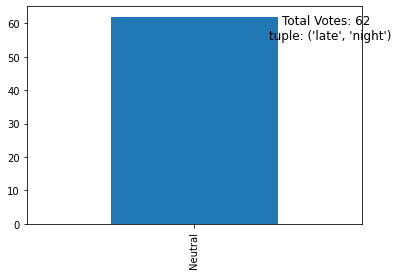

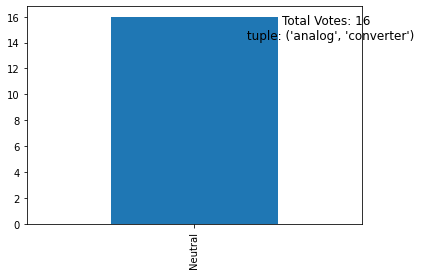

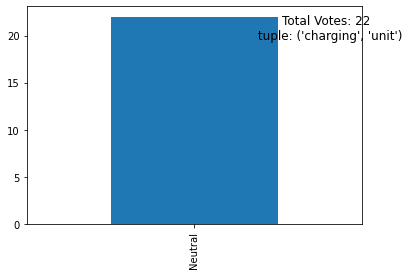

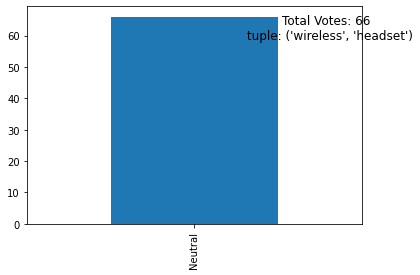

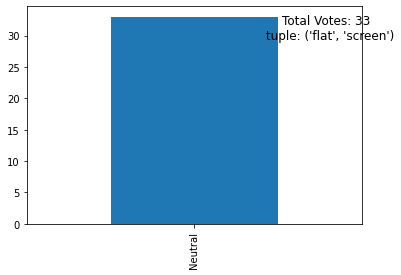

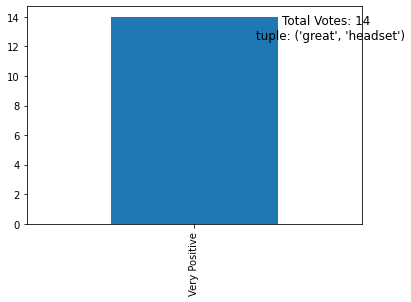

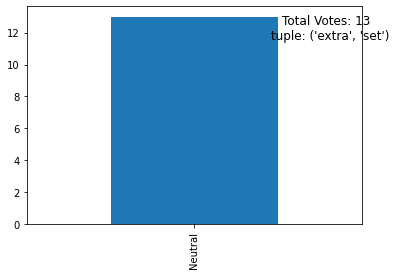

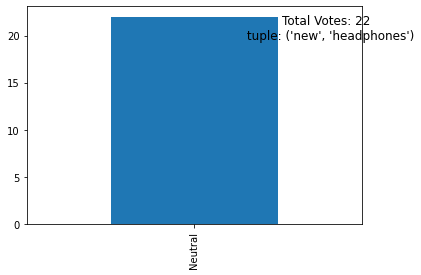

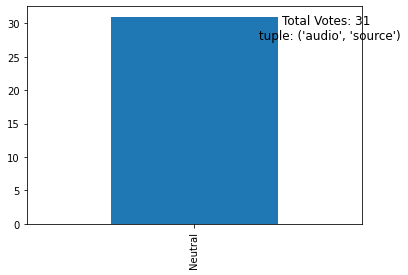

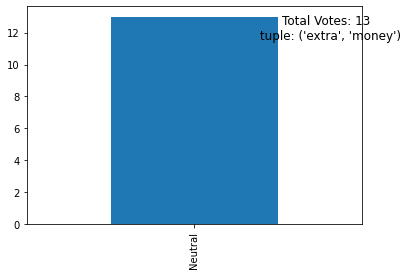

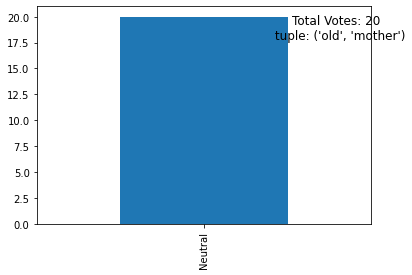

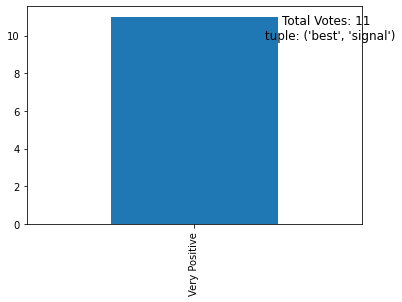

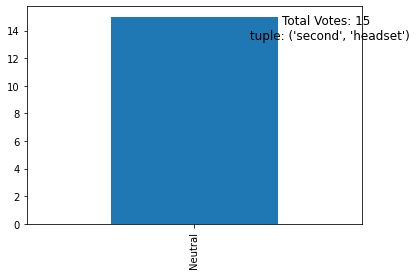

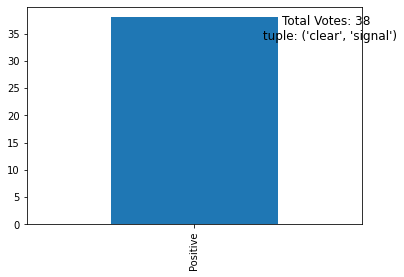

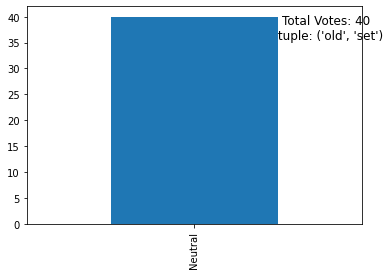

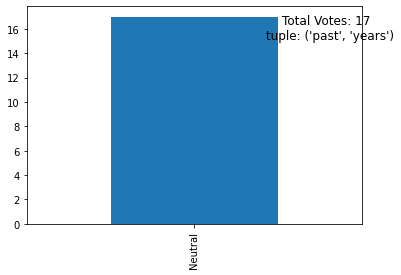

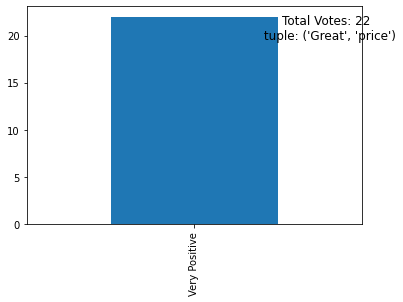

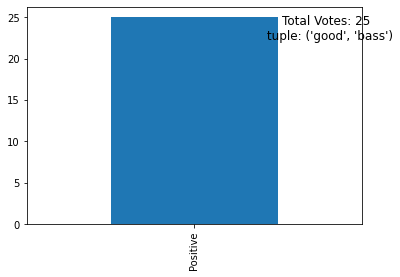

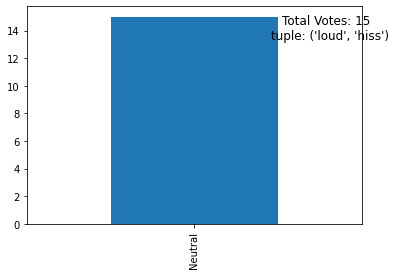

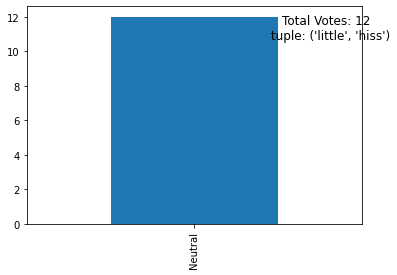

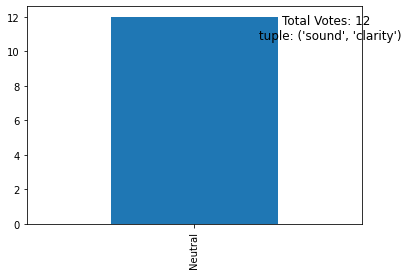

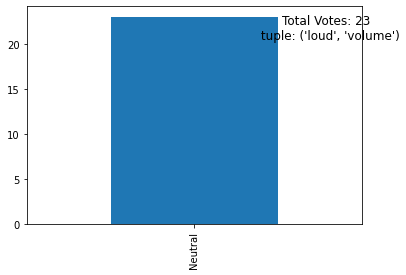

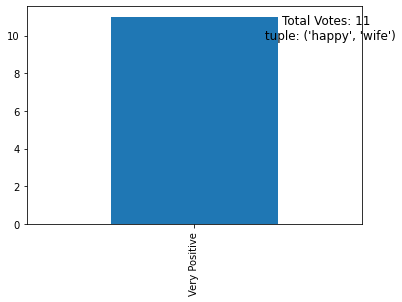

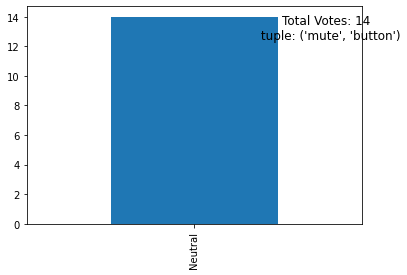

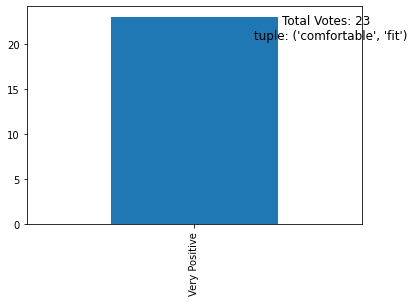

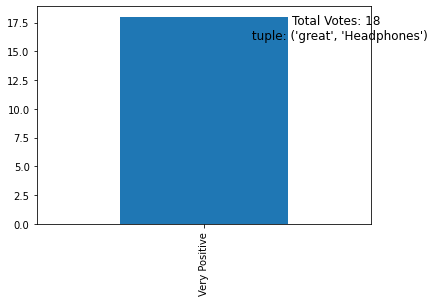

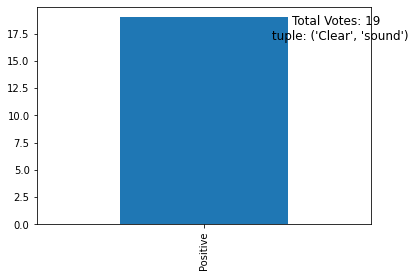

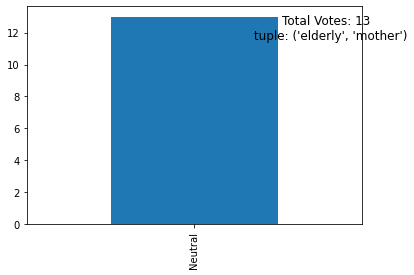

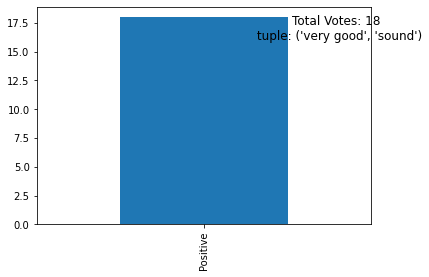

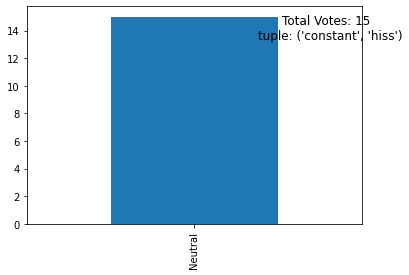

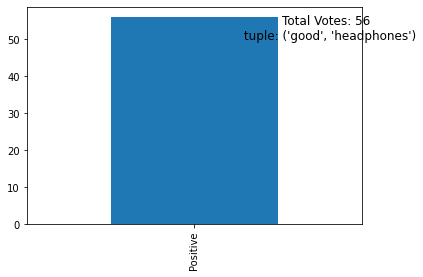

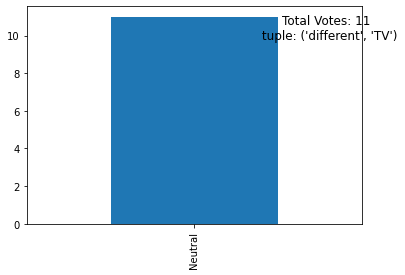

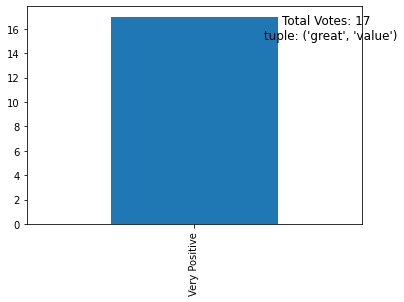

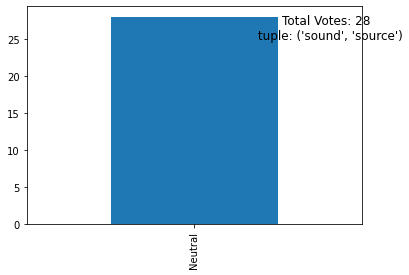

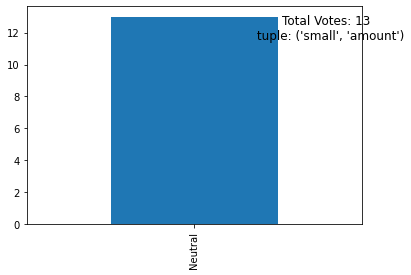

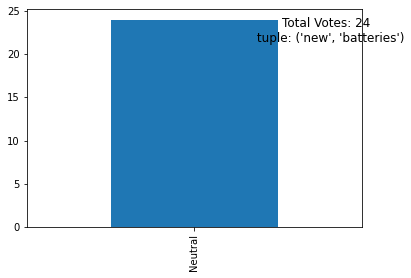

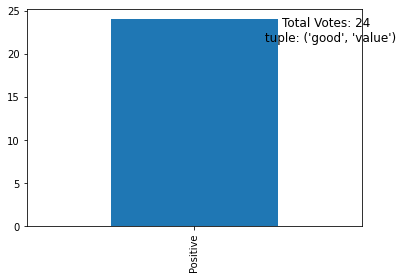

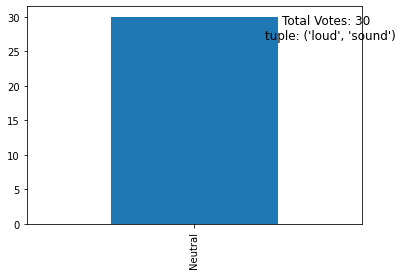

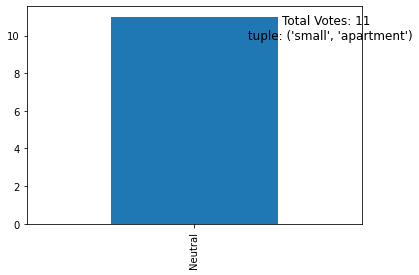

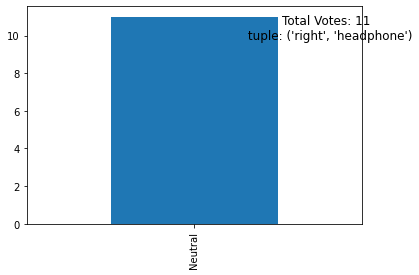

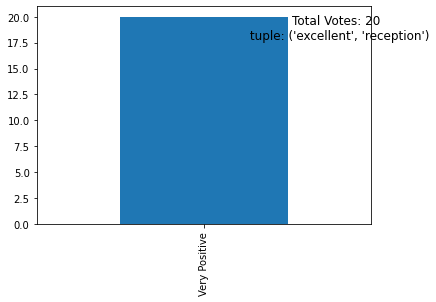

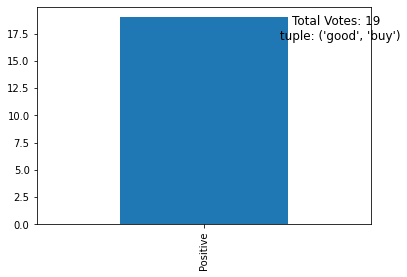

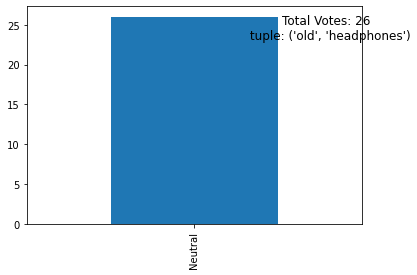

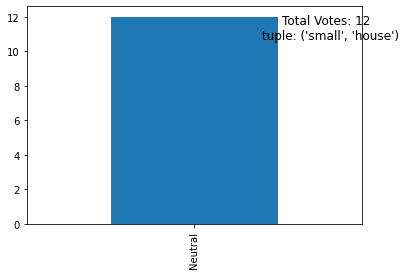

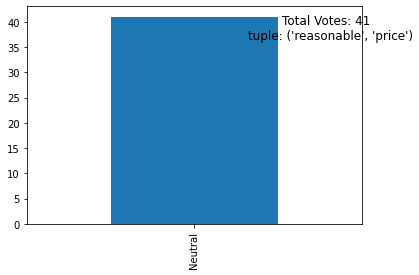

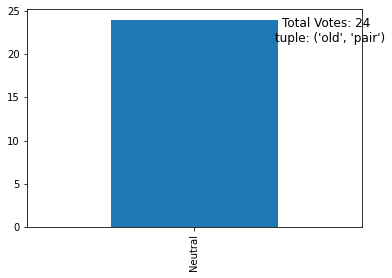

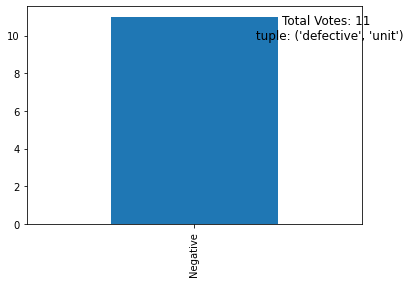

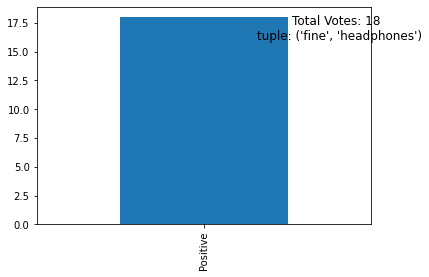

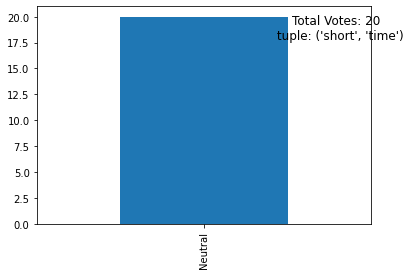

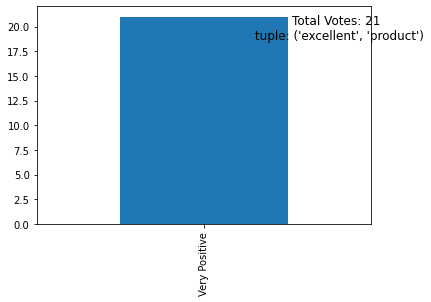

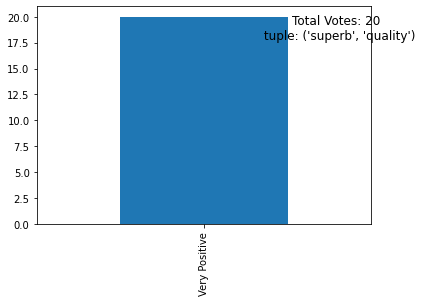

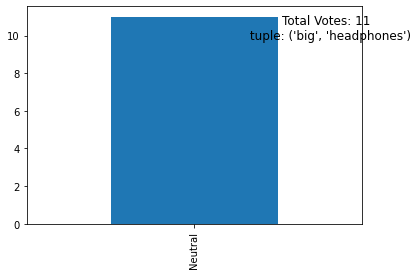

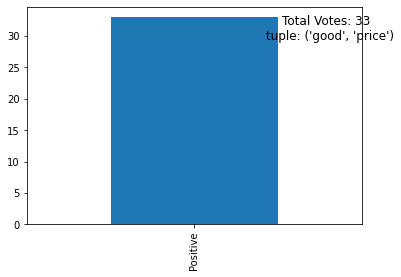

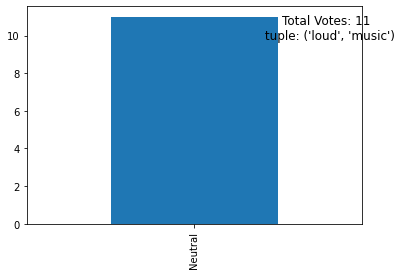

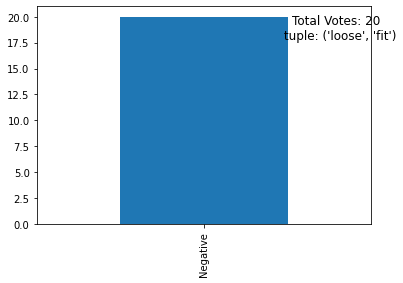

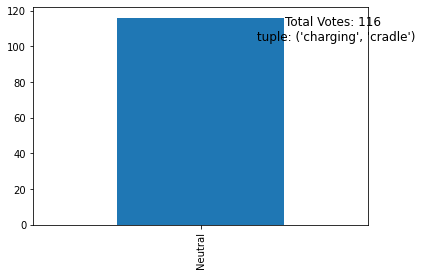

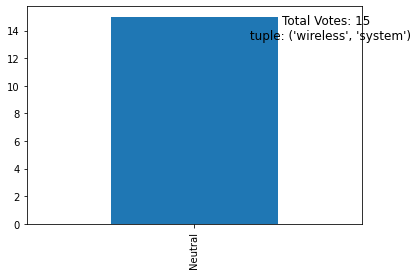

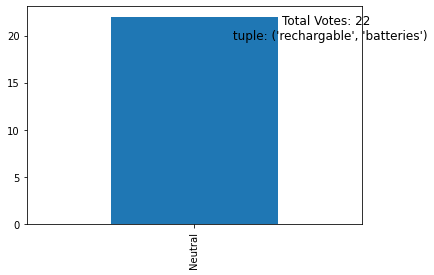

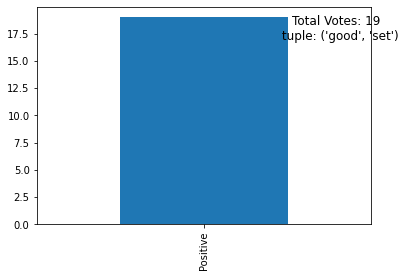

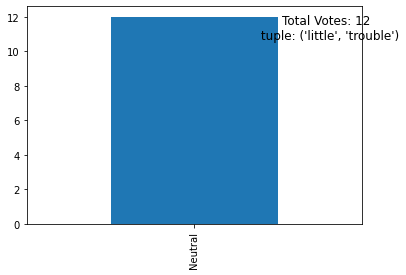

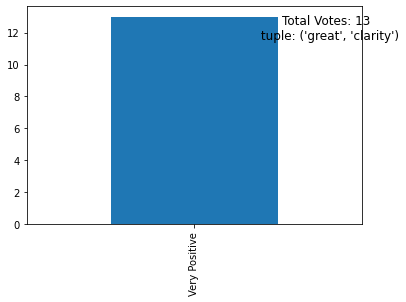

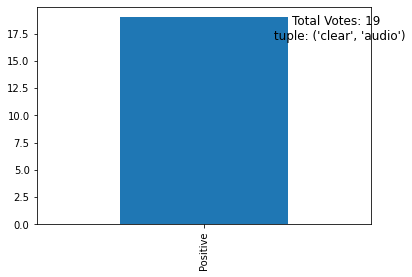

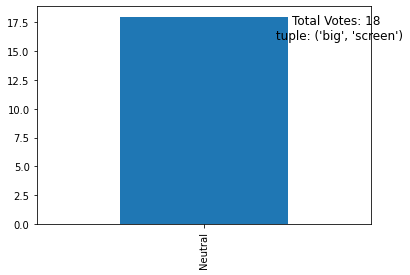

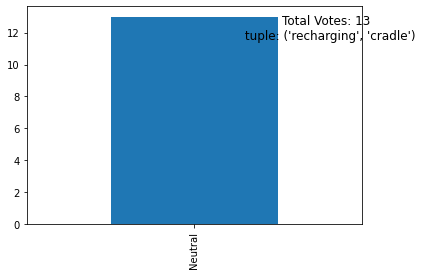

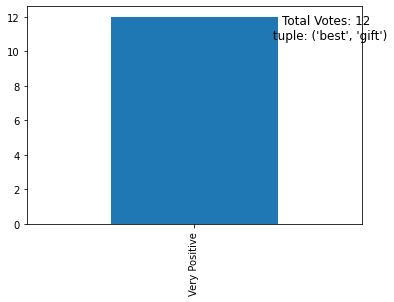

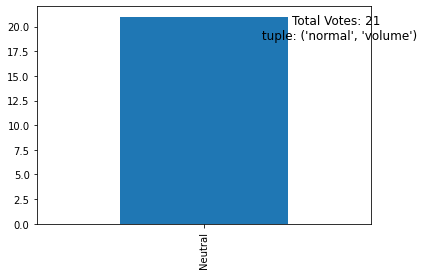

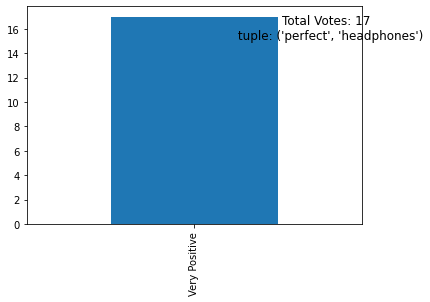

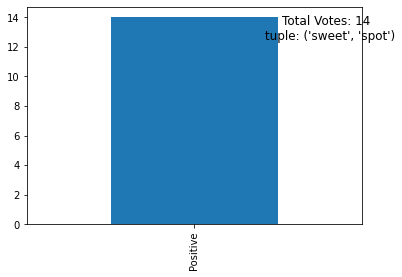

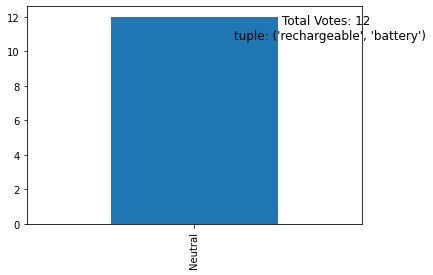

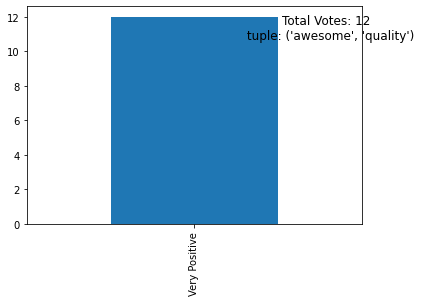

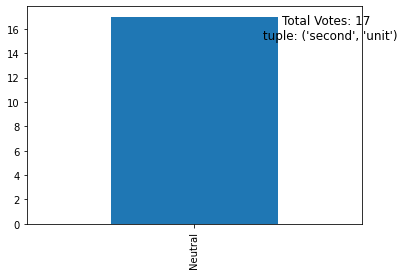

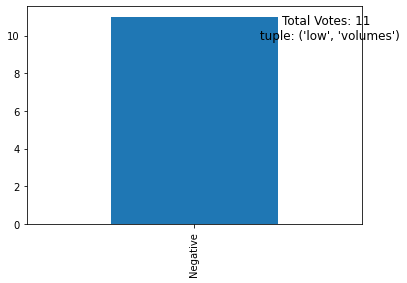

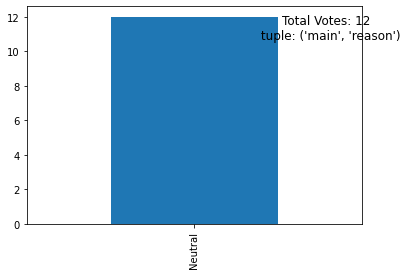

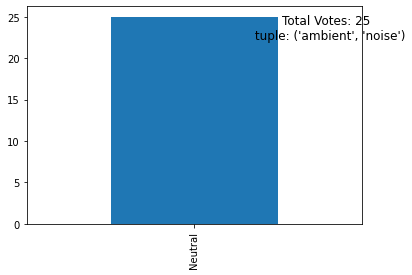

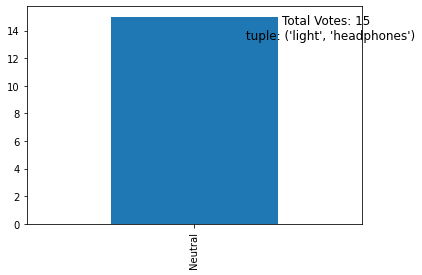

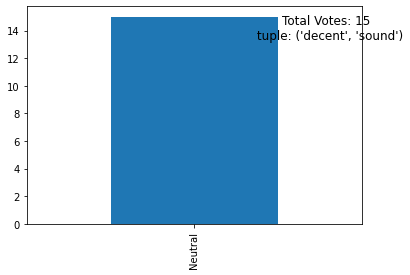

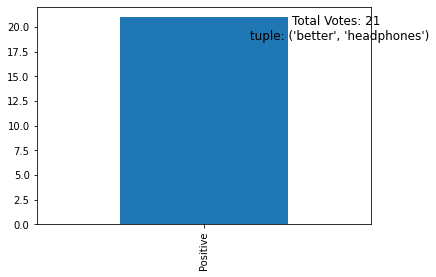

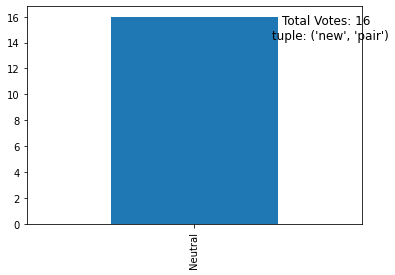

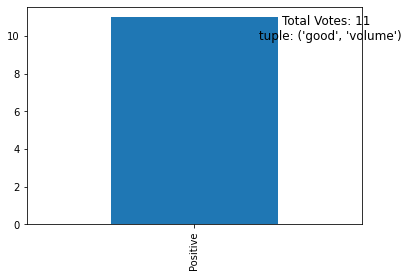

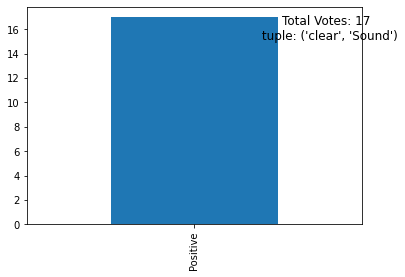

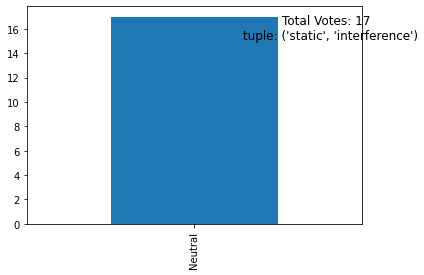

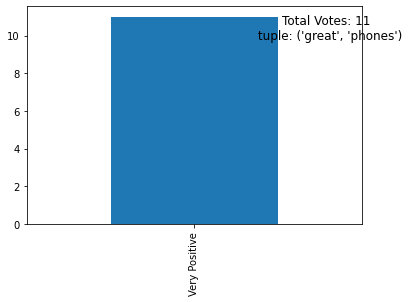

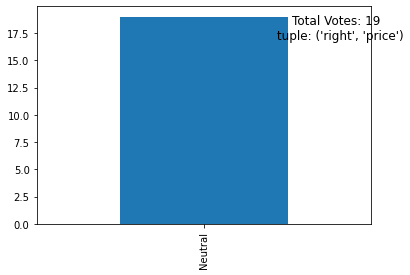

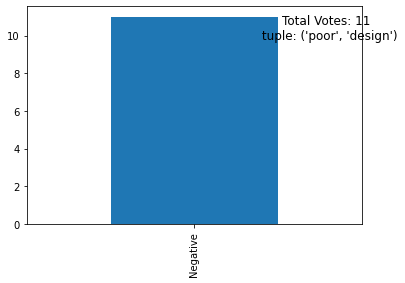

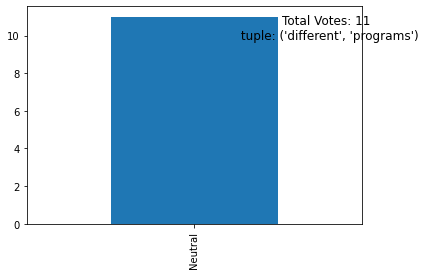

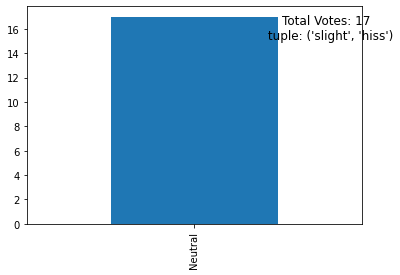

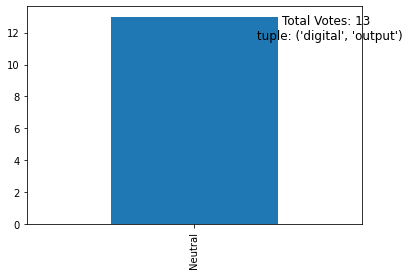

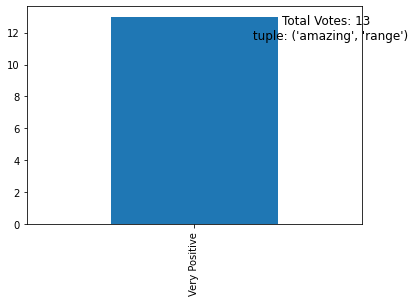

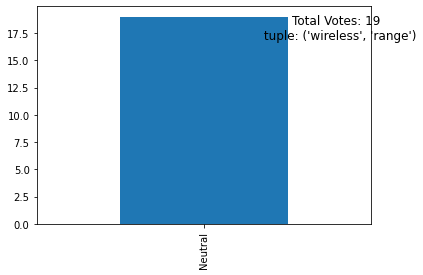

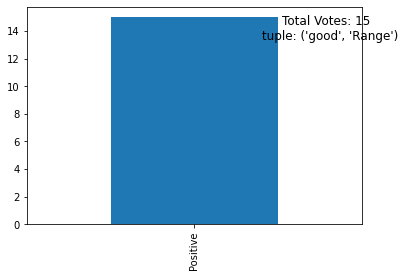

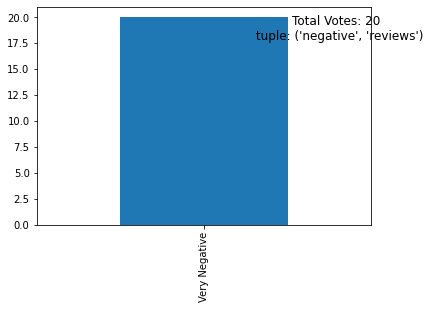

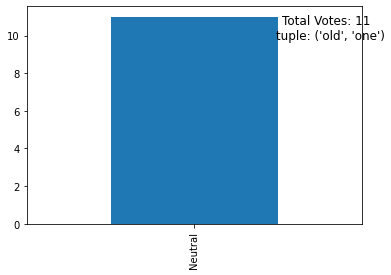

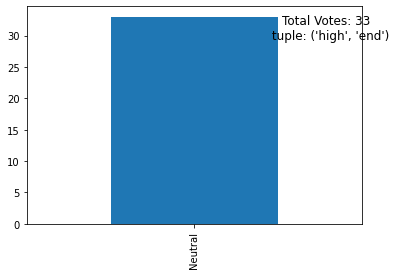

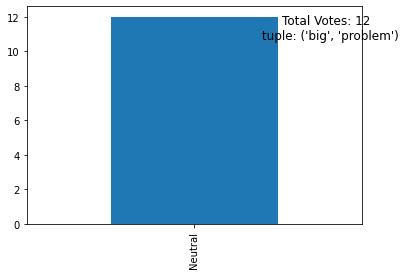

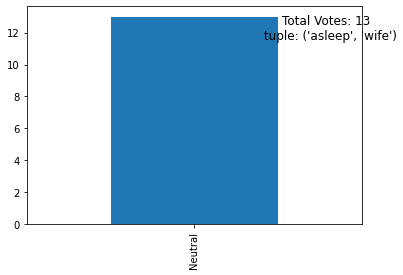

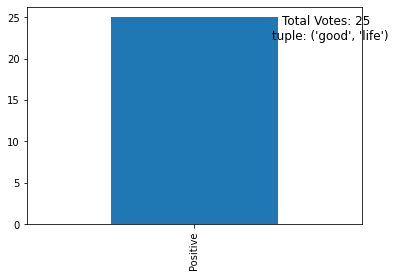

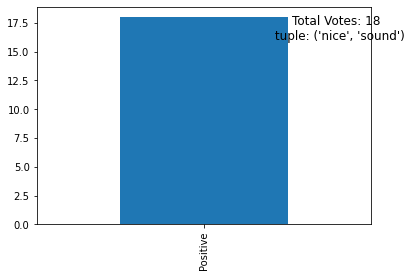

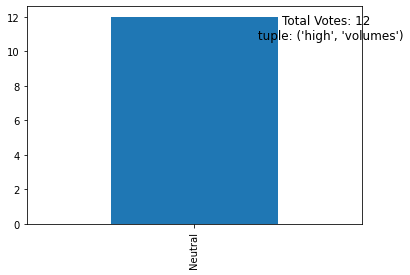

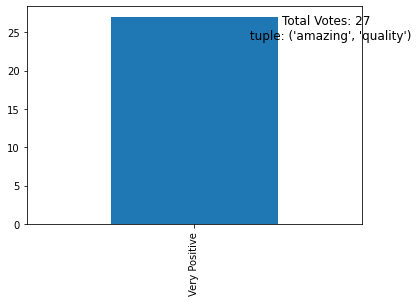

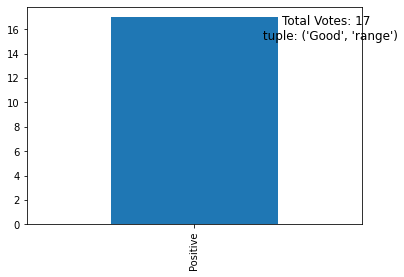

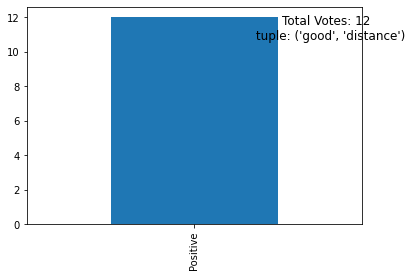

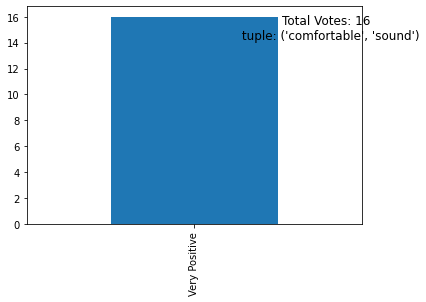

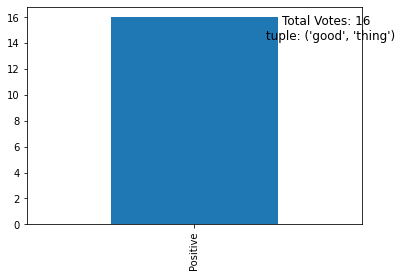

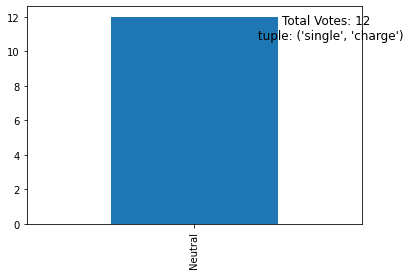

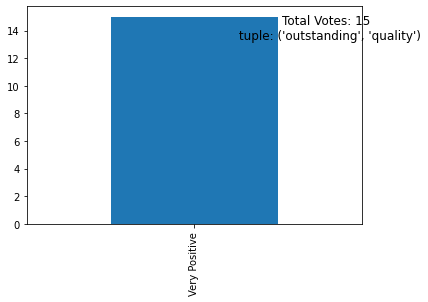

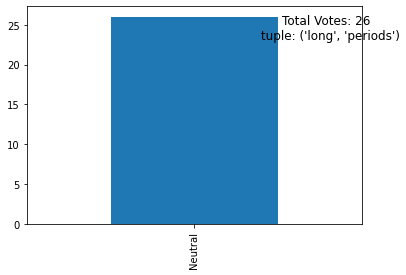

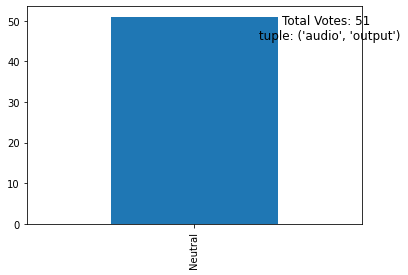

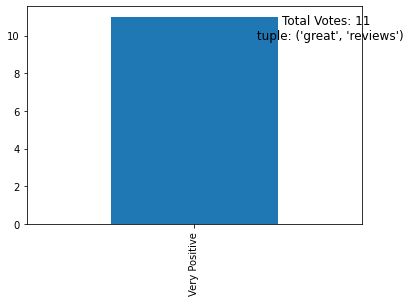

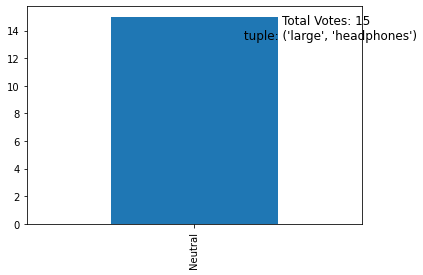

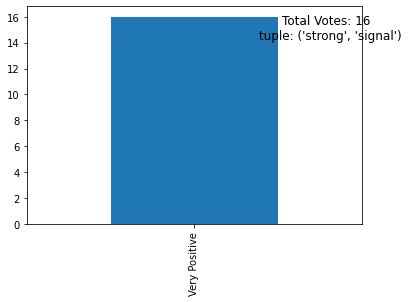

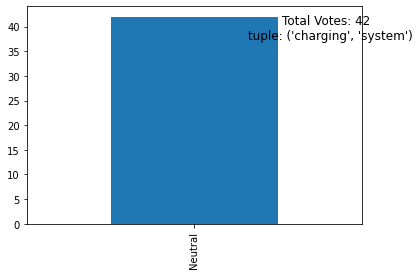

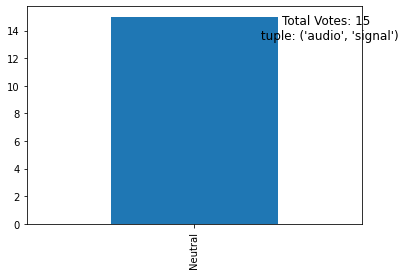

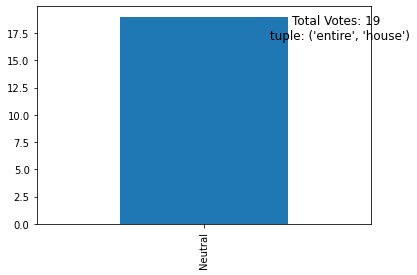

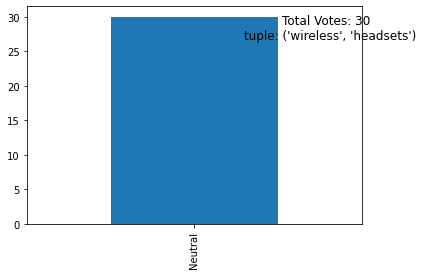

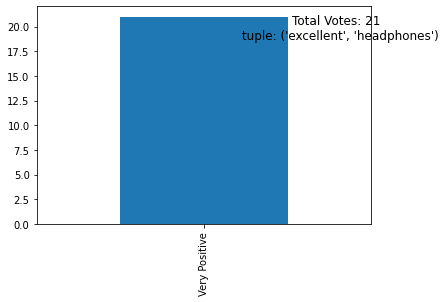

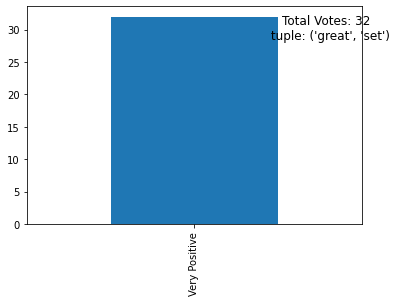

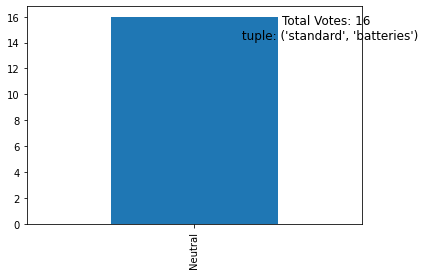

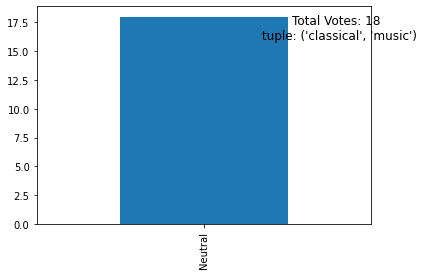

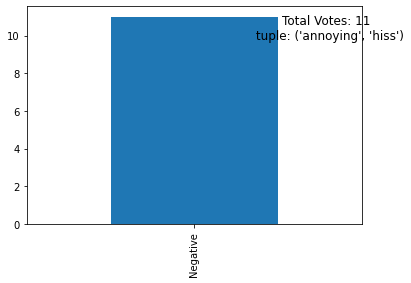

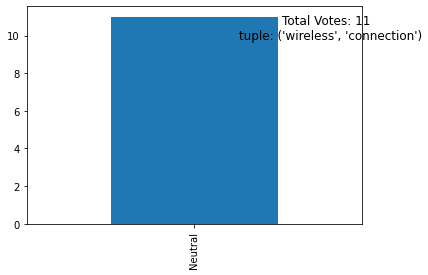

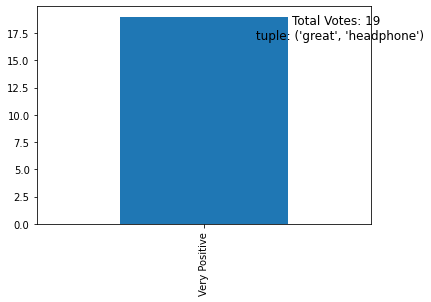

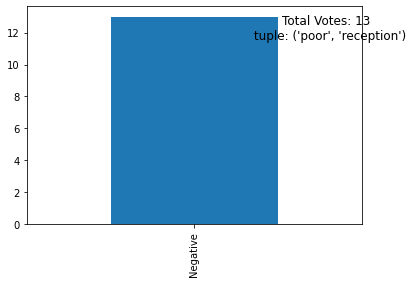

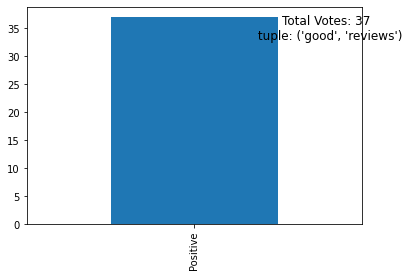

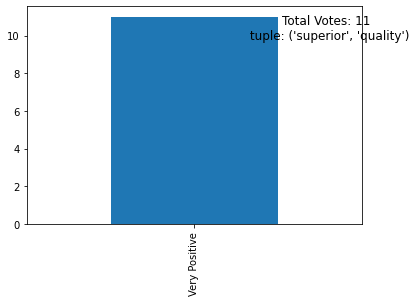

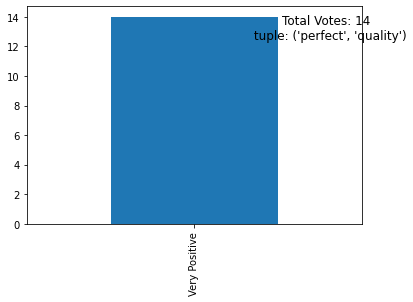

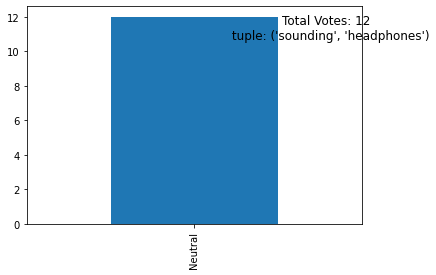

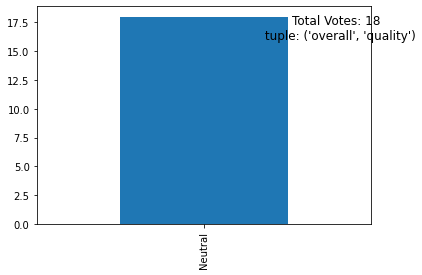

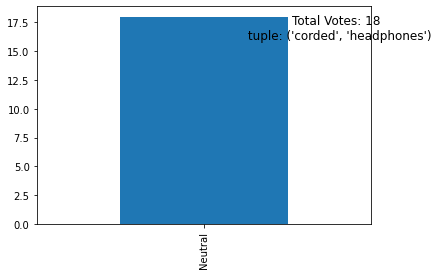

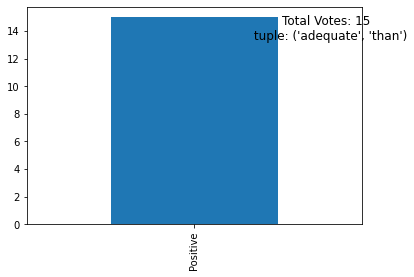

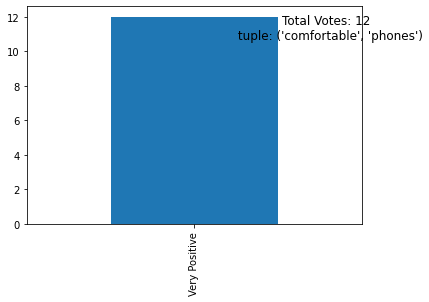

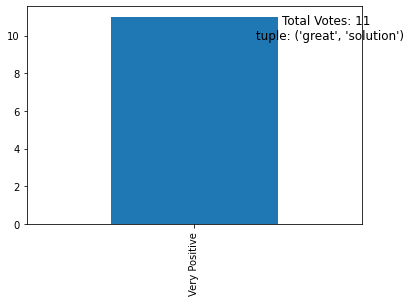

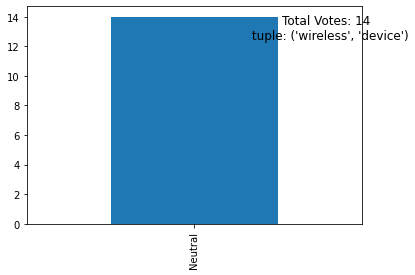

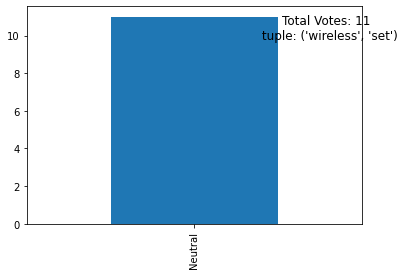

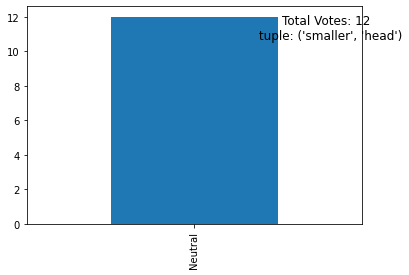

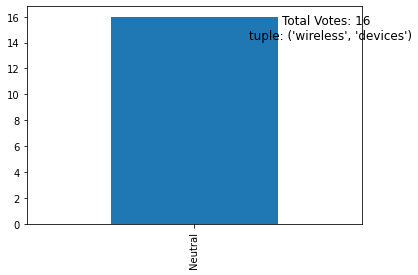

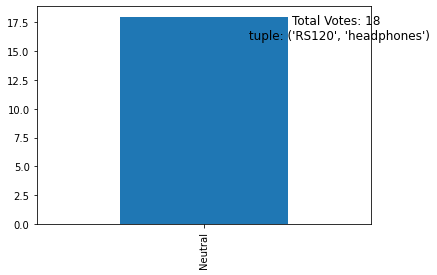

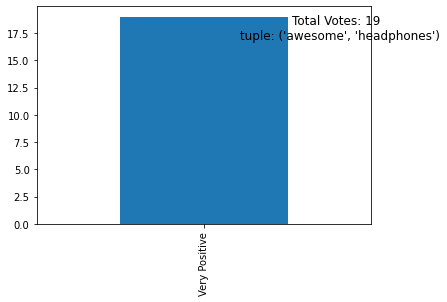

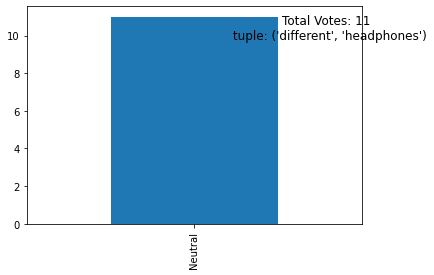

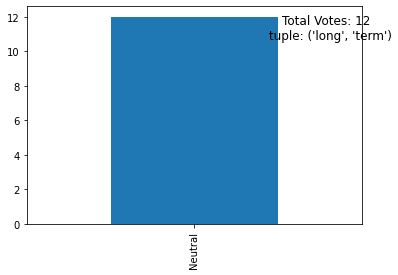

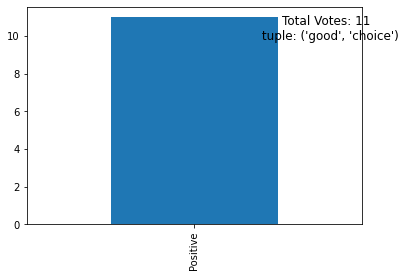

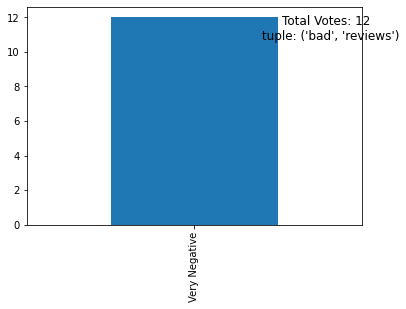

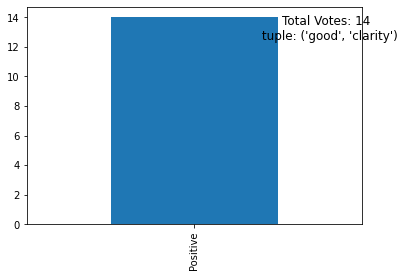

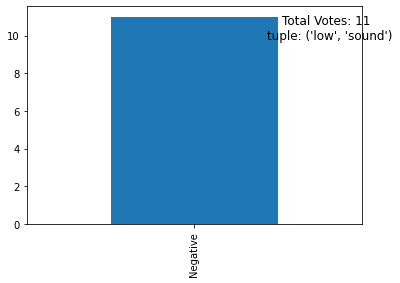

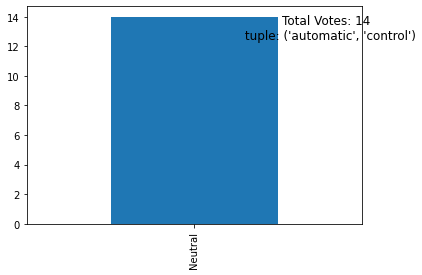

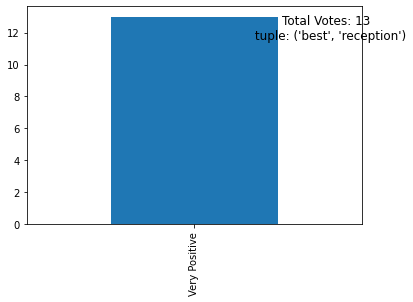

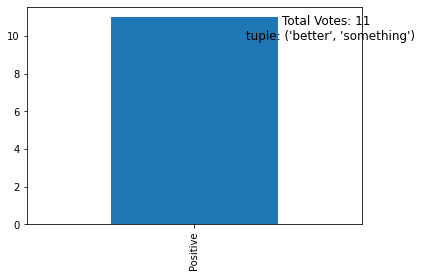

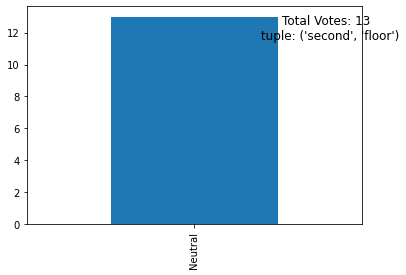

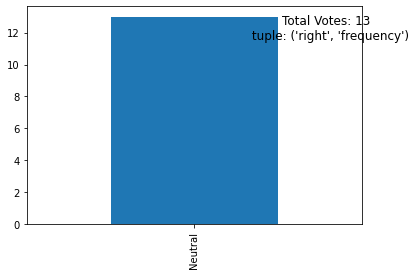

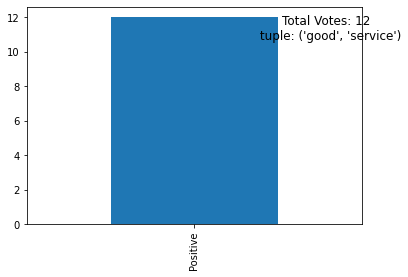

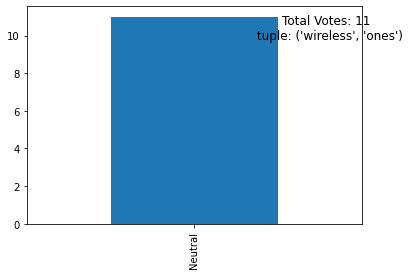

In [35]:
for tup in unique_tup_e:
    variance_visualizer(df_ex, tup)

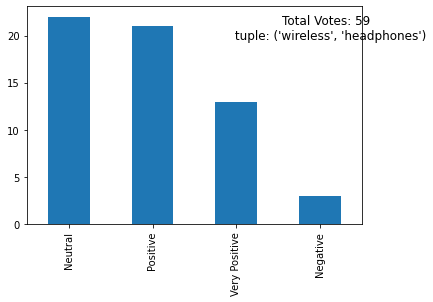

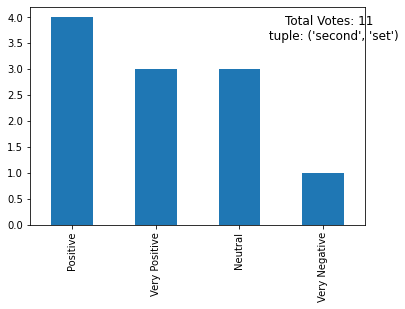

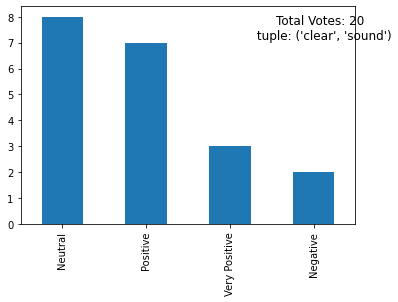

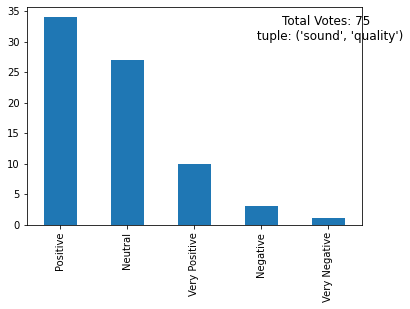

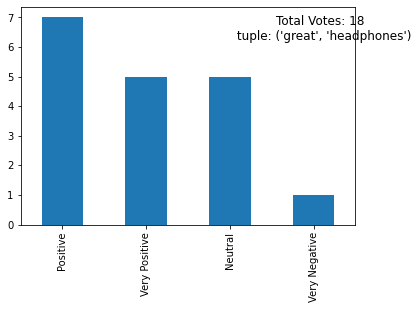

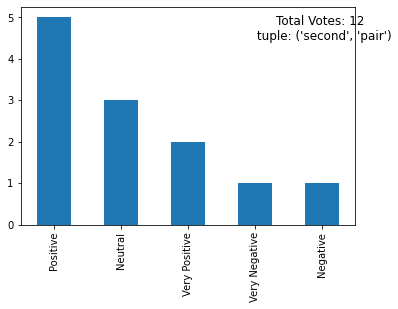

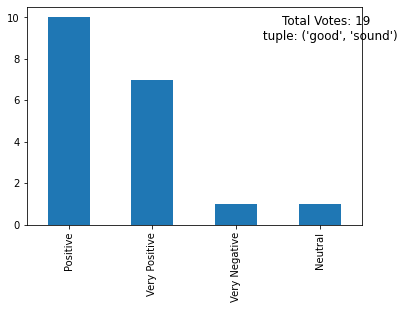

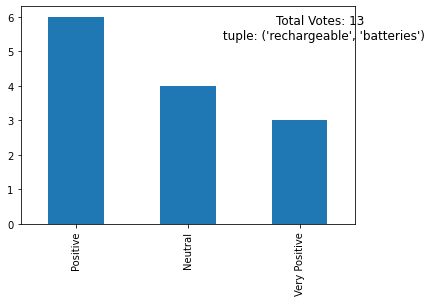

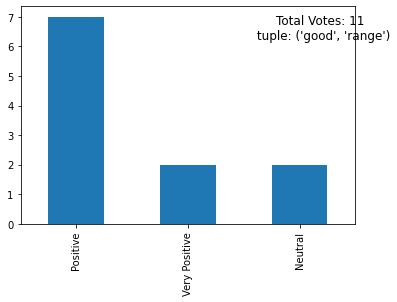

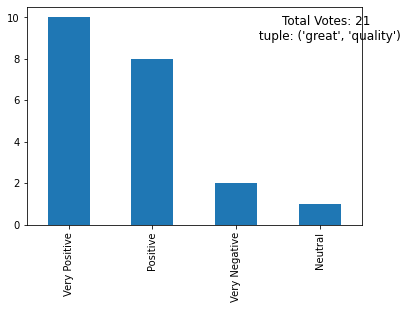

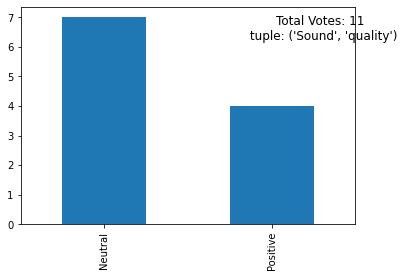

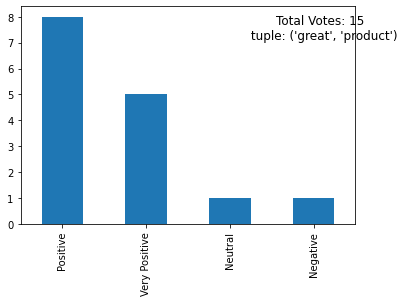

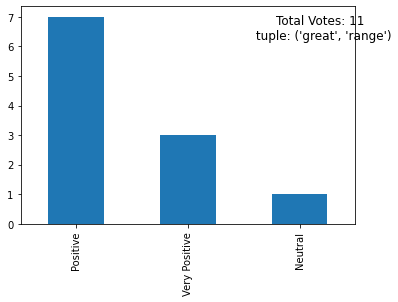

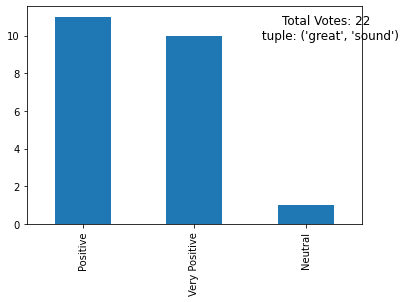

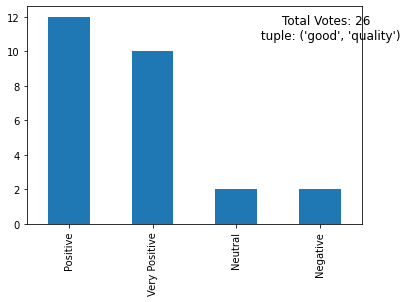

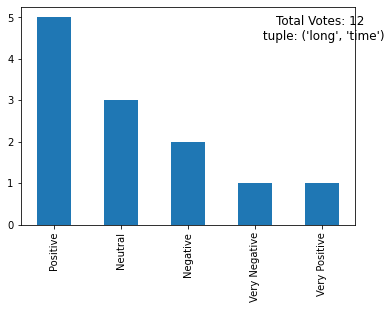

In [101]:
for tup in unique_tup:
    variance_visualizer(df_turk2, tup)

In [62]:
for tup in unique_tup_e:
     sum_squares(df_ex, tup)

('little', 'bit') Residual sum of squares: 0.0
('perfect', 'sound') Residual sum of squares: 0.0
('Sound', 'quality') Residual sum of squares: 0.0
('sound', 'quality') Residual sum of squares: 0.0
('great', 'quality') Residual sum of squares: 0.0
('easy', 'setup') Residual sum of squares: 0.0
('favorite', 'shows') Residual sum of squares: 0.0
('second', 'pair') Residual sum of squares: 0.0
('great', 'things') Residual sum of squares: 0.0
('Good', 'sound') Residual sum of squares: 0.0
('sure', 'for') Residual sum of squares: 0.0
('white', 'noise') Residual sum of squares: 0.0
('deep', 'bass') Residual sum of squares: 0.0
('optical', 'cable') Residual sum of squares: 0.0
('Great', 'sound') Residual sum of squares: 0.0
('great', 'headphones') Residual sum of squares: 0.0
('lower', 'volume') Residual sum of squares: 0.0
('bad', 'hearing') Residual sum of squares: 0.0
('rechargeable', 'batteries') Residual sum of squares: 0.0
('daily', 'use') Residual sum of squares: 0.0
('good', 'quality')

('constant', 'noise') Residual sum of squares: 0.0
('wonderful', 'quality') Residual sum of squares: 0.0
('charging', 'stand') Residual sum of squares: 0.0
('static', 'sound') Residual sum of squares: 0.0
('great', 'Sound') Residual sum of squares: 0.0
('great', 'gift') Residual sum of squares: 0.0
('perfectly', 'headphones') Residual sum of squares: 0.0
('loose', 'headphones') Residual sum of squares: 0.0
('late', 'night') Residual sum of squares: 0.0
('analog', 'converter') Residual sum of squares: 0.0
('charging', 'unit') Residual sum of squares: 0.0
('wireless', 'headset') Residual sum of squares: 0.0
('flat', 'screen') Residual sum of squares: 0.0
('great', 'headset') Residual sum of squares: 0.0
('extra', 'set') Residual sum of squares: 0.0
('new', 'headphones') Residual sum of squares: 0.0
('audio', 'source') Residual sum of squares: 0.0
('extra', 'money') Residual sum of squares: 0.0
('old', 'mother') Residual sum of squares: 0.0
('best', 'signal') Residual sum of squares: 0.0


In [98]:
emp_list = []
for tup in unique_tup:
    emp_list.append(sum_squares(df_turk2, tup))    
    
    
df_turk_var = pd.DataFrame(emp_list, columns=['asp', 'sum_of_squares'])  
df_turk_var.to_csv('data/turk_var1.csv')

emp_list = []
for tup in unique_tup_e:
     sum_squares(df_ex, tup)

df_ex_var = pd.DataFrame(emp_list, columns=['asp', 'sum_of_squares'])  
df_ex_var.to_csv('data/human_var1.csv')

In [92]:
df_turk_var

,asp,sum_of_squares
0,"(wireless, headphones)",232.750000
1,"(second, set)",4.750000
2,"(clear, sound)",26.000000
3,"(sound, quality)",870.000000
4,"(great, headphones)",19.000000
5,"(second, pair)",11.200000
6,"(good, sound)",60.750000
7,"(rechargeable, batteries)",4.666667
8,"(good, range)",16.666667
9,"(great, quality)",58.750000


In [93]:
# all values sum to zero

df_ex_var 

,asp,sum_of_squares


### Further Discussion and Future Work

1) Due to a lack of funding from grants and some other issues in expiremental design, I feel the most appropriate next step would be to repeat the experiment with more carefully collected labeled data. Increasing the reward per label and the requirements for submission (such as proving a proficiency in english) I believe cam substantiely improve the quality of the human labeled data and reduce the variance in this data significantly. Sourcing reliable test data is the number one priority in continuing future work for this project.

2) Integrate into AWS for scaling

3) integrate into a SQL server for data management

4) incoroprate a flash based UI for viewing results at scale

# THANK YOU


<nav> 
<a href="https://dev.to/ddey117">Blog</a> |
<a href="https://github.com/ddey117/ABSA_Project_4">GitHub</a> |                             
<a href="https://github.com/ddey117/preprocess_ddey117">PreProcess Github</a> 
</nav>


Dylan Dey

email: ddey2985@gmail.com

In [102]:
ls images

Class_Imbalance_Image.jpg            medal.png
CustomerService.jpg                  meh-face-emoticon.png
Image 5-20-22 at 4.06 PM.jpg         results_table2.jpg
Image 5-20-22 at 4.07 PM (1).jpg     sad.png
Image 5-20-22 at 4.07 PM.jpg         smiley.png
Image 5-20-22 at 4.18 PM.jpg         smiling-face.png
Modifieraspectopinion extractor.jpg  spaCy.jpg
creative-design.png                  value.png
extractor_example1.jpg               variance_graph_example.jpg
large_amz_tsv_output.jpg


![Variance Graph Example](images/variance_graph_example.jpg)

link: https://spacy.io/models/en

### Depencey Parser Rules Rules


**First Rule of Dependency Parser: The Aspect (A) token is a subject noun with a child Modifier (M) with a relation of amod (adjectival modifier). This just means that the aspect and opinion share a simple adjective/noun relationship that can be extracted. However, there are certain caveats that need to be kept in mind when parsing the tree for this rule. First, it is important to check to see if there is an additional adverbial modifier that could adjust the intensity of the sentiment implied by the adjective and adverb combination in regards to the subject/aspect. This is important to keep in mind as we are taking advantage of NLTK vader sentiment intensity analyzer which can make use of additional adverbs to get a better understanding of sentiment. Another important thing to keep in mind when parsing for this rule is to be aware of the possibility of negating the adjective with ‘no’ as a determiner.**

**Examples**

       M            A
The comfortable headphones.

    amod     M        A
The most comfortable headphones.


det    M           A
No comfortable features. 



**Second Rule of Dependency Parser: The aspect (A) is a child of something with a relation of nominal subject (nsubj.) while the modifier (M) is a child of the same something with a relationship of direct object. In this case, the adjective would be acting as the determiner of the clause. For simplicity's sake, it was determined to assume that each verb will have only one NSUBJ and DOBJ. This is a fair assumption for the application of this project, because even if there are multiple subjects, they will both be reviewing the same thing and will likely share the same opinion as it is written as a single review. For example, if an author were to say “My wife and I bought the awesome headphones”, we still only want to extract the keywords ‘awesome’ and ‘headphones.’**

**Example**

I bought the awesome headphones.  

“I” =  nsubj 
“headphones” = dobj
“awesome” = det



**THIRD RULE OF DEPENDENCY PARSE: The modifier (M) is a child of something with a relation of an adjectival complement (acomp), while the aspect (A) is a child of that same something with a relation of nominal subject (nsubj). See the example below.**

**Example:** Barb is happy about the sound quality.

A: sound quality
M: happy

This rule needs to handle special cases in which the child is tagged as a modal verb with an auxiliary dependency. This would flag for phrases such as “the sound of the speakers could be better.” For special cases like this, the parser will add a negative prefix before scoring the aspect/modifier pairs for sentiment. 

**Example:** ‘This could be better.”
Would be extracted as the following:
A = “this”
M = ”not better”




**FOURTH RULE OF DEPENDENCY PARSE : The aspect (A) is a child of something with a relationship of passive nominal subject (nsubjpass) while the modifier (M) is a child of that same something with a relationship of adverbial modifier (advmod).  nsubjpass: A passive nominal subject is a noun phrase which is the syntactic subject of a passive clause. This step of the parser will also check to add a negative prefix before extracting and scoring for sentiment if necessary.** 

The modifier is an adverbial modifier to a passive verb. 

**EXAMPLE:** The headphones died quickly

A: headphones
M: modifier

 

**FIFTH RULE OF DEPENDENCY PARSE: The aspect (A) is a child of the modifier with a relationship of nominal subject, while the modifier has a child with a relation of copula(cop).
Here the parser is looking for the complement of a copular verb. An often used copula verb is the word “is,” as in the phrase “Bill is big.”**

    #Assumption - A verb will have only one NSUBJ and DOBJ

cop: copula A copula is the relation between the complement of a copular verb and the copular verb. (We normally take a copula as a dependent of its complement.

**Example:**

The sound is awesome.

A: sound
M: awesome


**SIXTH RULE OF DEPENDENCY PARSE: Aspect/modifier are children of an interjection.**
    ## M - Sentiment modifier || A - Aspect
    ## INTJ (interjections like bravo, great etc)


**Example:** Bravo good headphones.

Aspect: headphones
Modifier: good



**SEVENTH RULE OF DEPENDENCY PARSE: This rule is similar to rule 5, but makes use of the attr (attribute) tag instead. It seems to function similarly, in which an attribute is considered a noun phrase following a copular verb.** 

ATTR - link between a verb like 'is/seem/appear/became' and its complement
    ## Example: 'this is garbage' -> (this, garbage)


##### All dependency parsing rules also account for named entitites